##### Steps for reading in dataset (following download), initial QC, dim reduction/clustering and saving out the myeloid cluster for **GSE162498**

file previously downloaded:
* GSE162498_RAW.tar

unzipped using 
``` bash
tar -xvf GSE162498_RAW.tar
```

This gives the following files: 
* GSM4952953_P34_Tumor_raw_feature_bc_matrix.tar.gz
* GSM4952954_P35_Tumor_raw_feature_bc_matrix.tar.gz
* GSM4952955_P42_Tumor_raw_feature_bc_matrix.tar.gz
* GSM4952956_P43_Tumor_raw_feature_bc_matrix.tar.gz
* GSM4952957_P46_Tumor_raw_feature_bc_matrix.tar.gz
* GSM4952958_P47_Tumor_raw_feature_bc_matrix.tar.gz
* GSM4952959_P55_Tumor_raw_feature_bc_matrix.tar.gz
* GSM4952960_P57_Tumor_raw_feature_bc_matrix.tar.gz
* GSM4952961_P57_Blood_raw_feature_bc_matrix.tar.gz
* GSM4952962_P58_Tumor_filtered_feature_bc_matrix.tar.gz
* GSM4952963_P58_Blood_filtered_feature_bc_matrix.tar.gz
* GSM4952964_P60_Tumor_filtered_feature_bc_matrix.tar.gz
* GSM4952965_P60_Juxta_filtered_feature_bc_matrix.tar.gz
* GSM4952966_P60_Blood_filtered_feature_bc_matrix.tar.gz
* GSM4952967_P61_Tumor_filtered_feature_bc_matrix.tar.gz
* GSM4952968_P61_Juxta_filtered_feature_bc_matrix.tar.gz
* GSM4952969_P61_Blood_filtered_feature_bc_matrix.tar.gz

Only using tumour and jaxta (adjacent healthy), not blood (moved to seperate sufolder)

I then used tar -xvf again to unzip each of the files above. This gives a folder per sample each containing standard barcodes, genes, and matrix file. (renamed as needed for loading, and had to then gzip all files to get the .gz needed)

Dataset is meant to contain data from 11 tumour and 2 juxta from patients with NSCLC

In [1]:
#first just testing loading P60 and P34

In [2]:
#set wd
getwd()
setwd('/scratch/user/s4436039/scdata/GSE162498')
getwd()

[1] "/scratch/user/s4436039/scdata/GSE162498/P34_Tumor"

[1] "/scratch/user/s4436039/scdata/GSE162498"

In [3]:
#Load packages
library(dplyr)
library(Seurat)
library(patchwork)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: SeuratObject

Loading required package: sp


Attaching package: ‘SeuratObject’


The following object is masked from ‘package:base’:

    intersect




In [7]:
P34_T.data <- Read10X(data.dir = "/scratch/user/s4436039/scdata/GSE162498/P34_Tumor")
P60_T.data <- Read10X(data.dir = "/scratch/user/s4436039/scdata/GSE162498/P60_Tumor")


In [9]:
tail(P34_T.data)
tail(P60_T.data)

  [[ suppressing 34 column names ‘AAACCTGAGAAACCAT-1’, ‘AAACCTGAGAAACCGC-1’, ‘AAACCTGAGAAACCTA-1’ ... ]]



6 x 737280 sparse Matrix of class "dgCMatrix"
                                                                              
AC004556.1 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .
AC233755.2 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .
AC233755.1 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .
AC240274.1 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .
AC213203.1 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .
FAM231B    . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .
                 
AC004556.1 ......
AC233755.2 ......
AC233755.1 ......
AC240274.1 ......
AC213203.1 ......
FAM231B    ......

 .....suppressing 737246 columns in show(); maybe adjust options(max.print=, width=)
 ..............................

  [[ suppressing 11052 column names ‘AAACCTGAGCCCGAAA-1’, ‘AAACCTGAGCTTATCG-1’, ‘AAACCTGAGGCTATCT-1’ ... ]]



6 x 11052 sparse Matrix of class "dgCMatrix"
                                                                              
AC004556.1 . . . . . . . . . . . . . . . . . . . . . . . . . . . . 1 1 . . . .
AC233755.2 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .
AC233755.1 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .
AC240274.1 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .
AC213203.1 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .
FAM231B    . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .
                                                                              
AC004556.1 . . . . . . . . . . . . . . . . . . . . . . . . . 1 . . . . . . . .
AC233755.2 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 1 . . .
AC233755.1 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .
AC240274.1 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .
AC21320

In [3]:
#load all datasets
CID3586.data <- Read10X(data.dir = "/scratch/user/s4436039/scdata/GSE176078/CID3586", gene.column=1)
CID3838.data <- Read10X(data.dir = "/scratch/user/s4436039/scdata/GSE176078/CID3838", gene.column=1) 
CID3921.data <- Read10X(data.dir = "/scratch/user/s4436039/scdata/GSE176078/CID3921", gene.column=1) 
CID3941.data <- Read10X(data.dir = "/scratch/user/s4436039/scdata/GSE176078/CID3941", gene.column=1) 
CID3946.data <- Read10X(data.dir = "/scratch/user/s4436039/scdata/GSE176078/CID3946", gene.column=1) 
CID3948.data <- Read10X(data.dir = "/scratch/user/s4436039/scdata/GSE176078/CID3948", gene.column=1) 
CID3963.data <- Read10X(data.dir = "/scratch/user/s4436039/scdata/GSE176078/CID3963", gene.column=1) 
CID4040.data <- Read10X(data.dir = "/scratch/user/s4436039/scdata/GSE176078/CID4040", gene.column=1) 
CID4066.data <- Read10X(data.dir = "/scratch/user/s4436039/scdata/GSE176078/CID4066", gene.column=1) 
CID4067.data <- Read10X(data.dir = "/scratch/user/s4436039/scdata/GSE176078/CID4067", gene.column=1) 
CID4290A.data <- Read10X(data.dir = "/scratch/user/s4436039/scdata/GSE176078/CID4290A", gene.column=1)  
CID4398.data <- Read10X(data.dir = "/scratch/user/s4436039/scdata/GSE176078/CID4398", gene.column=1) 
CID4461.data <- Read10X(data.dir = "/scratch/user/s4436039/scdata/GSE176078/CID4461", gene.column=1) 
CID4463.data <- Read10X(data.dir = "/scratch/user/s4436039/scdata/GSE176078/CID4463", gene.column=1) 
CID4465.data <- Read10X(data.dir = "/scratch/user/s4436039/scdata/GSE176078/CID4465", gene.column=1) 
CID4471.data <- Read10X(data.dir = "/scratch/user/s4436039/scdata/GSE176078/CID4471", gene.column=1) 
CID4495.data <- Read10X(data.dir = "/scratch/user/s4436039/scdata/GSE176078/CID4495", gene.column=1) 
CID4513.data <- Read10X(data.dir = "/scratch/user/s4436039/scdata/GSE176078/CID4513", gene.column=1) 
CID4515.data <- Read10X(data.dir = "/scratch/user/s4436039/scdata/GSE176078/CID4515", gene.column=1) 
CID4523.data <- Read10X(data.dir = "/scratch/user/s4436039/scdata/GSE176078/CID4523", gene.column=1) 
CID4530N.data <- Read10X(data.dir = "/scratch/user/s4436039/scdata/GSE176078/CID4530N", gene.column=1) 
CID4535.data <- Read10X(data.dir = "/scratch/user/s4436039/scdata/GSE176078/CID4535", gene.column=1) 
CID44041.data <- Read10X(data.dir = "/scratch/user/s4436039/scdata/GSE176078/CID44041", gene.column=1) 
CID44971.data <- Read10X(data.dir = "/scratch/user/s4436039/scdata/GSE176078/CID44971", gene.column=1) 
CID44991.data <- Read10X(data.dir = "/scratch/user/s4436039/scdata/GSE176078/CID44991", gene.column=1) 
CID45171.data <- Read10X(data.dir = "/scratch/user/s4436039/scdata/GSE176078/CID45171", gene.column=1) 

In [4]:
#load in meta data tables
CID3586_meta <- read.csv('./CID3586/metadata.csv')
CID3838_meta <- read.csv('./CID3838/metadata.csv')
CID3921_meta <- read.csv('./CID3921/metadata.csv')
CID3941_meta <- read.csv('./CID3941/metadata.csv')
CID3946_meta <- read.csv('./CID3946/metadata.csv')
CID3948_meta <- read.csv('./CID3948/metadata.csv')
CID3963_meta <- read.csv('./CID3963/metadata.csv')
CID4040_meta <- read.csv('./CID4040/metadata.csv')
CID4066_meta <- read.csv('./CID4066/metadata.csv')
CID4067_meta <- read.csv('./CID4067/metadata.csv')
CID4290A_meta <- read.csv('./CID4290A/metadata.csv')
CID4398_meta <- read.csv('./CID4398/metadata.csv')
CID4461_meta <- read.csv('./CID4461/metadata.csv')
CID4463_meta <- read.csv('./CID4463/metadata.csv')
CID4465_meta <- read.csv('./CID4465/metadata.csv')
CID4471_meta <- read.csv('./CID4471/metadata.csv')
CID4495_meta <- read.csv('./CID4495/metadata.csv')
CID4513_meta <- read.csv('./CID4513/metadata.csv')
CID4515_meta <- read.csv('./CID4515/metadata.csv')
CID4523_meta <- read.csv('./CID4523/metadata.csv')
CID4530N_meta <- read.csv('./CID4530N/metadata.csv')
CID4535_meta <- read.csv('./CID4535/metadata.csv')
CID44041_meta <- read.csv('./CID44041/metadata.csv')
CID44971_meta <- read.csv('./CID44971/metadata.csv')
CID44991_meta <- read.csv('./CID44991/metadata.csv')
CID45171_meta <- read.csv('./CID45171/metadata.csv')

In [5]:
CID3586 <- CreateSeuratObject(counts = CID3586.data, project = "GSE176078", min.features = 200, meta.data = CID3586_meta)
CID3838 <- CreateSeuratObject(counts = CID3838.data, project = "GSE176078", min.features = 200, meta.data = CID3838_meta)
CID3921 <- CreateSeuratObject(counts = CID3921.data, project = "GSE176078", min.features = 200, meta.data = CID3921_meta)
CID3941 <- CreateSeuratObject(counts = CID3941.data, project = "GSE176078", min.features = 200, meta.data = CID3941_meta)
CID3946 <- CreateSeuratObject(counts = CID3946.data, project = "GSE176078", min.features = 200, meta.data = CID3946_meta)
CID3948 <- CreateSeuratObject(counts = CID3948.data, project = "GSE176078", min.features = 200, meta.data = CID3948_meta)
CID3963 <- CreateSeuratObject(counts = CID3963.data, project = "GSE176078", min.features = 200, meta.data = CID3963_meta)
CID4040 <- CreateSeuratObject(counts = CID4040.data, project = "GSE176078", min.features = 200, meta.data = CID4040_meta)
CID4066 <- CreateSeuratObject(counts = CID4066.data, project = "GSE176078", min.features = 200, meta.data = CID4066_meta)
CID4067 <- CreateSeuratObject(counts = CID4067.data, project = "GSE176078", min.features = 200, meta.data = CID4067_meta)
CID4290A <- CreateSeuratObject(counts = CID4290A.data, project = "GSE176078", min.features = 200, meta.data = CID4290A_meta)
CID4398 <- CreateSeuratObject(counts = CID4398.data, project = "GSE176078", min.features = 200, meta.data = CID4398_meta)
CID4461 <- CreateSeuratObject(counts = CID4461.data, project = "GSE176078", min.features = 200, meta.data = CID4461_meta)
CID4463 <- CreateSeuratObject(counts = CID4463.data, project = "GSE176078", min.features = 200, meta.data = CID4463_meta)
CID4465 <- CreateSeuratObject(counts = CID4465.data, project = "GSE176078", min.features = 200, meta.data = CID4465_meta)
CID4471 <- CreateSeuratObject(counts = CID4471.data, project = "GSE176078", min.features = 200, meta.data = CID4471_meta)
CID4495 <- CreateSeuratObject(counts = CID4495.data, project = "GSE176078", min.features = 200, meta.data = CID4495_meta)
CID4513 <- CreateSeuratObject(counts = CID4513.data, project = "GSE176078", min.features = 200, meta.data = CID4513_meta)
CID4515 <- CreateSeuratObject(counts = CID4515.data, project = "GSE176078", min.features = 200, meta.data = CID4515_meta)
CID4523 <- CreateSeuratObject(counts = CID4523.data, project = "GSE176078", min.features = 200, meta.data = CID4523_meta)
CID4530N <- CreateSeuratObject(counts = CID4530N.data, project = "GSE176078", min.features = 200, meta.data = CID4530N_meta)
CID4535 <- CreateSeuratObject(counts = CID4535.data, project = "GSE176078", min.features = 200, meta.data = CID4535_meta)
CID44041 <- CreateSeuratObject(counts = CID44041.data, project = "GSE176078", min.features = 200, meta.data = CID44041_meta)
CID44971 <- CreateSeuratObject(counts = CID44971.data, project = "GSE176078", min.features = 200, meta.data = CID44971_meta)
CID44991 <- CreateSeuratObject(counts = CID44991.data, project = "GSE176078", min.features = 200, meta.data = CID44991_meta)
CID45171 <- CreateSeuratObject(counts = CID45171.data, project = "GSE176078", min.features = 200, meta.data = CID45171_meta)

In [6]:
head(colnames(CID3586))
head(colnames(CID4040))
head(colnames(CID44041))

[1] "CID3586_AAGACCTCAGCATGAG" "CID3586_AAGGTTCGTAGTACCT"
[3] "CID3586_ACCAGTAGTTGTGGCC" "CID3586_ACCCACTAGATGTCGG"
[5] "CID3586_ACTGATGGTCAACTGT" "CID3586_ACTTGTTAGGGAAACA"

[1] "CID4040_ACTGATGAGGCCTTCG" "CID4040_ACTTTCAGTCGAAGCA"
[3] "CID4040_AGTCTCCTCGTAATGC" "CID4040_ATAGACCGTCAGTCTA"
[5] "CID4040_ATAGAGACACGAGGAT" "CID4040_ATATCCTCACCGCTAG"

[1] "CID44041_AAAGTAGTCCTAGGGC" "CID44041_AACACGTCAACACCTA"
[3] "CID44041_AACTTTCTCCTACAGA" "CID44041_AAGGCAGTCATTGCGA"
[5] "CID44041_AAGGTTCGTTGTCGCG" "CID44041_AATCGGTAGAGCTGGT"

In [7]:
#determining subtype of each patient, repreated below code for every sample
table(CID45171$subtype)


HER2+ 
 2447 

### Summary 

|Patient|Subtype|
|-------|-------|
|CID3586|	HER2|
|CID3838|	HER2|
|CID3921|	HER2|
|CID3941|	ER|
|CID3946|	TNBC|
|CID3948|	ER|
|CID3963|	TNBC|
|CID4040|	ER|
|CID4066|	HER2|
|CID4067|	ER|
|CID4290A|	ER|
|CID4398|	ER|
|CID4461|	ER|
|CID4463|	ER|
|CID4465|	TNBC|
|CID4471|	ER|
|CID4495|	TNBC|
|CID4513|	TNBC|
|CID4515|	TNBC|
|CID4523|	TNBC|
|CID4530N|	ER|
|CID4535|	ER|
|CID44041|	TNBC|
|CID44971|	TNBC|
|CID44991|	TNBC|
|CID45171|	HER2|


In [8]:
#add metadata to each sample
CID3586@meta.data$sample_type <- "tumour"
CID3586@meta.data$cancer_type <- "HER2 Breast Cancer"
CID3586@meta.data$patient_id <- "CID3586"
CID3586@meta.data$sample_id <- "GSE176078_HER2_breast_CID3586"
colnames(CID3586) <- paste0("GSE176078_HER2_", colnames(CID3586))

In [9]:
#add metadata to each sample
CID3838@meta.data$sample_type <- "tumour"
CID3838@meta.data$cancer_type <- "HER2 Breast Cancer"
CID3838@meta.data$patient_id <- "CID3838"
CID3838@meta.data$sample_id <- "GSE176078_HER2_breast_CID3838"
colnames(CID3838) <- paste0("GSE176078_HER2_", colnames(CID3838))

In [10]:
#add metadata to each sample
CID3921@meta.data$sample_type <- "tumour"
CID3921@meta.data$cancer_type <- "HER2 Breast Cancer"
CID3921@meta.data$patient_id <- "CID3921"
CID3921@meta.data$sample_id <- "GSE176078_HER2_breast_CID3921"
colnames(CID3921) <- paste0("GSE176078_HER2_", colnames(CID3921))

In [11]:
#add metadata to each sample
CID3941@meta.data$sample_type <- "tumour"
CID3941@meta.data$cancer_type <- "ER Breast Cancer"
CID3941@meta.data$patient_id <- "CID3941"
CID3941@meta.data$sample_id <- "GSE176078_ER_breast_CID3941"
colnames(CID3941) <- paste0("GSE176078_ER_", colnames(CID3941))

In [12]:
#add metadata to each sample
CID3946@meta.data$sample_type <- "tumour"
CID3946@meta.data$cancer_type <- "TNBC"
CID3946@meta.data$patient_id <- "CID3946"
CID3946@meta.data$sample_id <- "GSE176078_TNBC_CID3946"
colnames(CID3946) <- paste0("GSE176078_TNBC_", colnames(CID3946))

In [13]:
#add metadata to each sample
CID3948@meta.data$sample_type <- "tumour"
CID3948@meta.data$cancer_type <- "ER Breast Cancer"
CID3948@meta.data$patient_id <- "CID3948"
CID3948@meta.data$sample_id <- "GSE176078_ER_breast_CID3948"
colnames(CID3948) <- paste0("GSE176078_ER_", colnames(CID3948))

In [14]:
#add metadata to each sample
CID3963@meta.data$sample_type <- "tumour"
CID3963@meta.data$cancer_type <- "TNBC"
CID3963@meta.data$patient_id <- "CID3963"
CID3963@meta.data$sample_id <- "GSE176078_TNBC_CID3963"
colnames(CID3963) <- paste0("GSE176078_TNBC_", colnames(CID3963))

In [15]:
#add metadata to each sample
CID4040@meta.data$sample_type <- "tumour"
CID4040@meta.data$cancer_type <- "ER Breast Cancer"
CID4040@meta.data$patient_id <- "CID4040"
CID4040@meta.data$sample_id <- "GSE176078_ER_breast_CID4040"
colnames(CID4040) <- paste0("GSE176078_ER_", colnames(CID4040))

In [16]:
#add metadata to each sample
CID4066@meta.data$sample_type <- "tumour"
CID4066@meta.data$cancer_type <- "HER2 Breast Cancer"
CID4066@meta.data$patient_id <- "CID4066"
CID4066@meta.data$sample_id <- "GSE176078_HER2_breast_CID4066"
colnames(CID4066) <- paste0("GSE176078_HER2_", colnames(CID4066))

In [17]:
#add metadata to each sample
CID4067@meta.data$sample_type <- "tumour"
CID4067@meta.data$cancer_type <- "ER Breast Cancer"
CID4067@meta.data$patient_id <- "CID4067"
CID4067@meta.data$sample_id <- "GSE176078_ER_breast_CID4067"
colnames(CID4067) <- paste0("GSE176078_ER_", colnames(CID4067))

In [18]:
#add metadata to each sample
CID4290A@meta.data$sample_type <- "tumour"
CID4290A@meta.data$cancer_type <- "ER Breast Cancer"
CID4290A@meta.data$patient_id <- "CID4290A"
CID4290A@meta.data$sample_id <- "GSE176078_ER_breast_CID4290A"
colnames(CID4290A) <- paste0("GSE176078_ER_", colnames(CID4290A))

In [19]:
#add metadata to each sample
CID4398@meta.data$sample_type <- "tumour"
CID4398@meta.data$cancer_type <- "ER Breast Cancer"
CID4398@meta.data$patient_id <- "CID4398"
CID4398@meta.data$sample_id <- "GSE176078_ER_breast_CID4398"
colnames(CID4398) <- paste0("GSE176078_ER_", colnames(CID4398))

In [20]:
#add metadata to each sample
CID4461@meta.data$sample_type <- "tumour"
CID4461@meta.data$cancer_type <- "ER Breast Cancer"
CID4461@meta.data$patient_id <- "CID4461"
CID4461@meta.data$sample_id <- "GSE176078_ER_breast_CID4461"
colnames(CID4461) <- paste0("GSE176078_ER_", colnames(CID4461))

In [21]:
#add metadata to each sample
CID4463@meta.data$sample_type <- "tumour"
CID4463@meta.data$cancer_type <- "ER Breast Cancer"
CID4463@meta.data$patient_id <- "CID4463"
CID4463@meta.data$sample_id <- "GSE176078_ER_breast_CID4463"
colnames(CID4463) <- paste0("GSE176078_ER_", colnames(CID4463))

In [22]:
#add metadata to each sample
CID4465@meta.data$sample_type <- "tumour"
CID4465@meta.data$cancer_type <- "TNBC"
CID4465@meta.data$patient_id <- "CID4465"
CID4465@meta.data$sample_id <- "GSE176078_TNBC_CID4465"
colnames(CID4465) <- paste0("GSE176078_TNBC_", colnames(CID4465))

In [23]:
#add metadata to each sample
CID4471@meta.data$sample_type <- "tumour"
CID4471@meta.data$cancer_type <- "ER Breast Cancer"
CID4471@meta.data$patient_id <- "CID4471"
CID4471@meta.data$sample_id <- "GSE176078_ER_breast_CID4471"
colnames(CID4471) <- paste0("GSE176078_ER_", colnames(CID4471))

In [24]:
#add metadata to each sample
CID4495@meta.data$sample_type <- "tumour"
CID4495@meta.data$cancer_type <- "TNBC"
CID4495@meta.data$patient_id <- "CID4495"
CID4495@meta.data$sample_id <- "GSE176078_TNBC_CID4495"
colnames(CID4495) <- paste0("GSE176078_TNBC_", colnames(CID4495))

In [25]:
#add metadata to each sample
CID4513@meta.data$sample_type <- "tumour"
CID4513@meta.data$cancer_type <- "TNBC"
CID4513@meta.data$patient_id <- "CID4513"
CID4513@meta.data$sample_id <- "GSE176078_TNBC_CID4513"
colnames(CID4513) <- paste0("GSE176078_TNBC_", colnames(CID4513))

In [26]:
#add metadata to each sample
CID4515@meta.data$sample_type <- "tumour"
CID4515@meta.data$cancer_type <- "TNBC"
CID4515@meta.data$patient_id <- "CID4515"
CID4515@meta.data$sample_id <- "GSE176078_TNBC_CID4515"
colnames(CID4515) <- paste0("GSE176078_TNBC_", colnames(CID4515))

In [27]:
#add metadata to each sample
CID4523@meta.data$sample_type <- "tumour"
CID4523@meta.data$cancer_type <- "TNBC"
CID4523@meta.data$patient_id <- "CID4523"
CID4523@meta.data$sample_id <- "GSE176078_TNBC_CID4523"
colnames(CID4523) <- paste0("GSE176078_TNBC_", colnames(CID4523))

In [28]:
#add metadata to each sample
CID4530N@meta.data$sample_type <- "tumour"
CID4530N@meta.data$cancer_type <- "ER Breast Cancer"
CID4530N@meta.data$patient_id <- "CID4530N"
CID4530N@meta.data$sample_id <- "GSE176078_ER_breast_CID4530N"
colnames(CID4530N) <- paste0("GSE176078_ER_", colnames(CID4530N))

In [29]:
#add metadata to each sample
CID4535@meta.data$sample_type <- "tumour"
CID4535@meta.data$cancer_type <- "ER Breast Cancer"
CID4535@meta.data$patient_id <- "CID4535"
CID4535@meta.data$sample_id <- "GSE176078_ER_breast_CID4535"
colnames(CID4535) <- paste0("GSE176078_ER_", colnames(CID4535))

In [30]:
#add metadata to each sample
CID44041@meta.data$sample_type <- "tumour"
CID44041@meta.data$cancer_type <- "TNBC"
CID44041@meta.data$patient_id <- "CID44041"
CID44041@meta.data$sample_id <- "GSE176078_TNBC_CID44041"
colnames(CID44041) <- paste0("GSE176078_TNBC_", colnames(CID44041))

In [31]:
#add metadata to each sample
CID44971@meta.data$sample_type <- "tumour"
CID44971@meta.data$cancer_type <- "TNBC"
CID44971@meta.data$patient_id <- "CID44971"
CID44971@meta.data$sample_id <- "GSE176078_TNBC_CID44971"
colnames(CID44971) <- paste0("GSE176078_TNBC_", colnames(CID44971))

In [32]:
#add metadata to each sample
CID44991@meta.data$sample_type <- "tumour"
CID44991@meta.data$cancer_type <- "TNBC"
CID44991@meta.data$patient_id <- "CID44991"
CID44991@meta.data$sample_id <- "GSE176078_TNBC_CID44991"
colnames(CID44991) <- paste0("GSE176078_TNBC_", colnames(CID44991))

In [33]:
#add metadata to each sample
CID45171@meta.data$sample_type <- "tumour"
CID45171@meta.data$cancer_type <- "HER2 Breast Cancer"
CID45171@meta.data$patient_id <- "CID45171"
CID45171@meta.data$sample_id <- "GSE176078_HER2_breast_CID45171"
colnames(CID45171) <- paste0("GSE176078_HER2_", colnames(CID45171))

In [34]:
head(CID4067@meta.data) 
head(CID3921@meta.data) 
head(CID44041@meta.data) 

orig.ident nCount_RNA nFeature_RNA
GSE176078_ER_CID4067_AAACCTGGTCAATGTC CID4067    6242       2140        
GSE176078_ER_CID4067_ACACCCTAGATATGCA CID4067     857        489        
GSE176078_ER_CID4067_ACACCGGGTACCAGTT CID4067     705        449        
GSE176078_ER_CID4067_ACAGCTAAGGACCACA CID4067    1017        517        
GSE176078_ER_CID4067_ACATGGTTCGGATGTT CID4067    3340       1497        
GSE176078_ER_CID4067_ACCAGTATCATCGCTC CID4067    2017        909        
                                      X                        percent.mito
GSE176078_ER_CID4067_AAACCTGGTCAATGTC CID4067_AAACCTGGTCAATGTC 1.954502    
GSE176078_ER_CID4067_ACACCCTAGATATGCA CID4067_ACACCCTAGATATGCA 4.550758    
GSE176078_ER_CID4067_ACACCGGGTACCAGTT CID4067_ACACCGGGTACCAGTT 2.836879    
GSE176078_ER_CID4067_ACAGCTAAGGACCACA CID4067_ACAGCTAAGGACCACA 7.472960    
GSE176078_ER_CID4067_ACATGGTTCGGATGTT CID4067_ACATGGTTCGGATGTT 4.670659    
GSE176078_ER_CID4067_ACCAGTATCATCGCTC CID4067_ACCAGTATCATCGCTC 6.693109    
                                      subtype celltype_subset  
GSE176078_ER_CID4067_AAACCTGGTCAATGTC ER+     Endothelial ACKR1
GSE176078_ER_CID4067_ACACCCTAGATATGCA ER+     Endothelial ACKR1
GSE176078_ER_CID4067_ACACCGGGTACCAGTT ER+     Endothelial ACKR1
GSE176078_ER_CID4067_ACAGCTAAGGACCACA ER+     Endothelial ACKR1
GSE176078_ER_CID4067_ACATGGTTCGGATGTT ER+     Endothelial ACKR1
GSE176078_ER_CID4067_ACCAGTATCATCGCTC ER+     Endothelial ACKR1
                                      celltype_minor    celltype_major
GSE176078_ER_CID4067_AAACCTGGTCAATGTC Endothelial ACKR1 Endothelial   
GSE176078_ER_CID4067_ACACCCTAGATATGCA Endothelial ACKR1 Endothelial   
GSE176078_ER_CID4067_ACACCGGGTACCAGTT Endothelial ACKR1 Endothelial   
GSE176078_ER_CID4067_ACAGCTAAGGACCACA Endothelial ACKR1 Endothelial   
GSE176078_ER_CID4067_ACATGGTTCGGATGTT Endothelial ACKR1 Endothelial   
GSE176078_ER_CID4067_ACCAGTATCATCGCTC Endothelial ACKR1 Endothelial   
                                      sample_type cancer_type      patient_id
GSE176078_ER_CID4067_AAACCTGGTCAATGTC tumour      ER Breast Cancer CID4067   
GSE176078_ER_CID4067_ACACCCTAGATATGCA tumour      ER Breast Cancer CID4067   
GSE176078_ER_CID4067_ACACCGGGTACCAGTT tumour      ER Breast Cancer CID4067   
GSE176078_ER_CID4067_ACAGCTAAGGACCACA tumour      ER Breast Cancer CID4067   
GSE176078_ER_CID4067_ACATGGTTCGGATGTT tumour      ER Breast Cancer CID4067   
GSE176078_ER_CID4067_ACCAGTATCATCGCTC tumour      ER Breast Cancer CID4067   
                                      sample_id                  
GSE176078_ER_CID4067_AAACCTGGTCAATGTC GSE176078_ER_breast_CID4067
GSE176078_ER_CID4067_ACACCCTAGATATGCA GSE176078_ER_breast_CID4067
GSE176078_ER_CID4067_ACACCGGGTACCAGTT GSE176078_ER_breast_CID4067
GSE176078_ER_CID4067_ACAGCTAAGGACCACA GSE176078_ER_breast_CID4067
GSE176078_ER_CID4067_ACATGGTTCGGATGTT GSE176078_ER_breast_CID4067
GSE176078_ER_CID4067_ACCAGTATCATCGCTC GSE176078_ER_breast_CID4067

orig.ident nCount_RNA nFeature_RNA
GSE176078_HER2_CID3921_AAAGATGGTGAGGCTA CID3921     1432       763        
GSE176078_HER2_CID3921_AAAGATGTCCATGAGT CID3921    12038      3222        
GSE176078_HER2_CID3921_AACCATGCAGTAACGG CID3921     6120      2032        
GSE176078_HER2_CID3921_AACCGCGGTCAGAATA CID3921     1302       648        
GSE176078_HER2_CID3921_AACGTTGTCAGCTGGC CID3921     3105      1259        
GSE176078_HER2_CID3921_AAGACCTGTAGAGTGC CID3921    11371      3002        
                                        X                        percent.mito
GSE176078_HER2_CID3921_AAAGATGGTGAGGCTA CID3921_AAAGATGGTGAGGCTA 12.430168   
GSE176078_HER2_CID3921_AAAGATGTCCATGAGT CID3921_AAAGATGTCCATGAGT  8.041203   
GSE176078_HER2_CID3921_AACCATGCAGTAACGG CID3921_AACCATGCAGTAACGG 11.486928   
GSE176078_HER2_CID3921_AACCGCGGTCAGAATA CID3921_AACCGCGGTCAGAATA  3.533026   
GSE176078_HER2_CID3921_AACGTTGTCAGCTGGC CID3921_AACGTTGTCAGCTGGC  7.922705   
GSE176078_HER2_CID3921_AAGACCTGTAGAGTGC CID3921_AAGACCTGTAGAGTGC  6.472606   
                                        subtype celltype_subset  
GSE176078_HER2_CID3921_AAAGATGGTGAGGCTA HER2+   Endothelial ACKR1
GSE176078_HER2_CID3921_AAAGATGTCCATGAGT HER2+   Endothelial ACKR1
GSE176078_HER2_CID3921_AACCATGCAGTAACGG HER2+   Endothelial ACKR1
GSE176078_HER2_CID3921_AACCGCGGTCAGAATA HER2+   Endothelial ACKR1
GSE176078_HER2_CID3921_AACGTTGTCAGCTGGC HER2+   Endothelial ACKR1
GSE176078_HER2_CID3921_AAGACCTGTAGAGTGC HER2+   Endothelial ACKR1
                                        celltype_minor    celltype_major
GSE176078_HER2_CID3921_AAAGATGGTGAGGCTA Endothelial ACKR1 Endothelial   
GSE176078_HER2_CID3921_AAAGATGTCCATGAGT Endothelial ACKR1 Endothelial   
GSE176078_HER2_CID3921_AACCATGCAGTAACGG Endothelial ACKR1 Endothelial   
GSE176078_HER2_CID3921_AACCGCGGTCAGAATA Endothelial ACKR1 Endothelial   
GSE176078_HER2_CID3921_AACGTTGTCAGCTGGC Endothelial ACKR1 Endothelial   
GSE176078_HER2_CID3921_AAGACCTGTAGAGTGC Endothelial ACKR1 Endothelial   
                                        sample_type cancer_type       
GSE176078_HER2_CID3921_AAAGATGGTGAGGCTA tumour      HER2 Breast Cancer
GSE176078_HER2_CID3921_AAAGATGTCCATGAGT tumour      HER2 Breast Cancer
GSE176078_HER2_CID3921_AACCATGCAGTAACGG tumour      HER2 Breast Cancer
GSE176078_HER2_CID3921_AACCGCGGTCAGAATA tumour      HER2 Breast Cancer
GSE176078_HER2_CID3921_AACGTTGTCAGCTGGC tumour      HER2 Breast Cancer
GSE176078_HER2_CID3921_AAGACCTGTAGAGTGC tumour      HER2 Breast Cancer
                                        patient_id
GSE176078_HER2_CID3921_AAAGATGGTGAGGCTA CID3921   
GSE176078_HER2_CID3921_AAAGATGTCCATGAGT CID3921   
GSE176078_HER2_CID3921_AACCATGCAGTAACGG CID3921   
GSE176078_HER2_CID3921_AACCGCGGTCAGAATA CID3921   
GSE176078_HER2_CID3921_AACGTTGTCAGCTGGC CID3921   
GSE176078_HER2_CID3921_AAGACCTGTAGAGTGC CID3921   
                                        sample_id                    
GSE176078_HER2_CID3921_AAAGATGGTGAGGCTA GSE176078_HER2_breast_CID3921
GSE176078_HER2_CID3921_AAAGATGTCCATGAGT GSE176078_HER2_breast_CID3921
GSE176078_HER2_CID3921_AACCATGCAGTAACGG GSE176078_HER2_breast_CID3921
GSE176078_HER2_CID3921_AACCGCGGTCAGAATA GSE176078_HER2_breast_CID3921
GSE176078_HER2_CID3921_AACGTTGTCAGCTGGC GSE176078_HER2_breast_CID3921
GSE176078_HER2_CID3921_AAGACCTGTAGAGTGC GSE176078_HER2_breast_CID3921

orig.ident nCount_RNA nFeature_RNA
GSE176078_TNBC_CID44041_AAAGTAGTCCTAGGGC CID44041   3001       1338        
GSE176078_TNBC_CID44041_AACACGTCAACACCTA CID44041   2917       1154        
GSE176078_TNBC_CID44041_AACTTTCTCCTACAGA CID44041   4866       1782        
GSE176078_TNBC_CID44041_AAGGCAGTCATTGCGA CID44041   4826       1658        
GSE176078_TNBC_CID44041_AAGGTTCGTTGTCGCG CID44041   3233       1269        
GSE176078_TNBC_CID44041_AATCGGTAGAGCTGGT CID44041   4253       1427        
                                         X                         percent.mito
GSE176078_TNBC_CID44041_AAAGTAGTCCTAGGGC CID44041_AAAGTAGTCCTAGGGC 4.065312    
GSE176078_TNBC_CID44041_AACACGTCAACACCTA CID44041_AACACGTCAACACCTA 5.382242    
GSE176078_TNBC_CID44041_AACTTTCTCCTACAGA CID44041_AACTTTCTCCTACAGA 2.096178    
GSE176078_TNBC_CID44041_AAGGCAGTCATTGCGA CID44041_AAGGCAGTCATTGCGA 3.273933    
GSE176078_TNBC_CID44041_AAGGTTCGTTGTCGCG CID44041_AAGGTTCGTTGTCGCG 4.515929    
GSE176078_TNBC_CID44041_AATCGGTAGAGCTGGT CID44041_AATCGGTAGAGCTGGT 2.845051    
                                         subtype celltype_subset  
GSE176078_TNBC_CID44041_AAAGTAGTCCTAGGGC TNBC    Endothelial ACKR1
GSE176078_TNBC_CID44041_AACACGTCAACACCTA TNBC    Endothelial ACKR1
GSE176078_TNBC_CID44041_AACTTTCTCCTACAGA TNBC    Endothelial ACKR1
GSE176078_TNBC_CID44041_AAGGCAGTCATTGCGA TNBC    Endothelial ACKR1
GSE176078_TNBC_CID44041_AAGGTTCGTTGTCGCG TNBC    Endothelial ACKR1
GSE176078_TNBC_CID44041_AATCGGTAGAGCTGGT TNBC    Endothelial ACKR1
                                         celltype_minor    celltype_major
GSE176078_TNBC_CID44041_AAAGTAGTCCTAGGGC Endothelial ACKR1 Endothelial   
GSE176078_TNBC_CID44041_AACACGTCAACACCTA Endothelial ACKR1 Endothelial   
GSE176078_TNBC_CID44041_AACTTTCTCCTACAGA Endothelial ACKR1 Endothelial   
GSE176078_TNBC_CID44041_AAGGCAGTCATTGCGA Endothelial ACKR1 Endothelial   
GSE176078_TNBC_CID44041_AAGGTTCGTTGTCGCG Endothelial ACKR1 Endothelial   
GSE176078_TNBC_CID44041_AATCGGTAGAGCTGGT Endothelial ACKR1 Endothelial   
                                         sample_type cancer_type patient_id
GSE176078_TNBC_CID44041_AAAGTAGTCCTAGGGC tumour      TNBC        CID44041  
GSE176078_TNBC_CID44041_AACACGTCAACACCTA tumour      TNBC        CID44041  
GSE176078_TNBC_CID44041_AACTTTCTCCTACAGA tumour      TNBC        CID44041  
GSE176078_TNBC_CID44041_AAGGCAGTCATTGCGA tumour      TNBC        CID44041  
GSE176078_TNBC_CID44041_AAGGTTCGTTGTCGCG tumour      TNBC        CID44041  
GSE176078_TNBC_CID44041_AATCGGTAGAGCTGGT tumour      TNBC        CID44041  
                                         sample_id              
GSE176078_TNBC_CID44041_AAAGTAGTCCTAGGGC GSE176078_TNBC_CID44041
GSE176078_TNBC_CID44041_AACACGTCAACACCTA GSE176078_TNBC_CID44041
GSE176078_TNBC_CID44041_AACTTTCTCCTACAGA GSE176078_TNBC_CID44041
GSE176078_TNBC_CID44041_AAGGCAGTCATTGCGA GSE176078_TNBC_CID44041
GSE176078_TNBC_CID44041_AAGGTTCGTTGTCGCG GSE176078_TNBC_CID44041
GSE176078_TNBC_CID44041_AATCGGTAGAGCTGGT GSE176078_TNBC_CID44041

In [36]:
#Merge seurat objects
BC <- merge(CID3586, y = c(CID3838, CID3921, CID3941, CID3946, CID3948, CID3963, CID4040, CID4066, CID4067, CID4290A, CID4398, CID4461, CID4463, CID4465, CID4471, CID4495, CID4513, CID4515, CID4523, CID4530N, CID4535, CID44041, CID44971, CID44991, CID45171), project = "GSE176078")

In [37]:
BC
head(BC@meta.data)
tail(BC@meta.data)

An object of class Seurat 
29733 features across 100064 samples within 1 assay 
Active assay: RNA (29733 features, 0 variable features)
 26 layers present: counts.1, counts.2, counts.3, counts.4, counts.5, counts.6, counts.7, counts.8, counts.9, counts.10, counts.11, counts.12, counts.13, counts.14, counts.15, counts.16, counts.17, counts.18, counts.19, counts.20, counts.21, counts.22, counts.23, counts.24, counts.25, counts.26

orig.ident nCount_RNA nFeature_RNA
GSE176078_HER2_CID3586_AAGACCTCAGCATGAG CID3586    4581       1689        
GSE176078_HER2_CID3586_AAGGTTCGTAGTACCT CID3586    1726        779        
GSE176078_HER2_CID3586_ACCAGTAGTTGTGGCC CID3586    1229        514        
GSE176078_HER2_CID3586_ACCCACTAGATGTCGG CID3586    1352        609        
GSE176078_HER2_CID3586_ACTGATGGTCAACTGT CID3586    1711        807        
GSE176078_HER2_CID3586_ACTTGTTAGGGAAACA CID3586    1468        764        
                                        X                        percent.mito
GSE176078_HER2_CID3586_AAGACCTCAGCATGAG CID3586_AAGACCTCAGCATGAG  1.506221   
GSE176078_HER2_CID3586_AAGGTTCGTAGTACCT CID3586_AAGGTTCGTAGTACCT  5.793743   
GSE176078_HER2_CID3586_ACCAGTAGTTGTGGCC CID3586_ACCAGTAGTTGTGGCC  1.383238   
GSE176078_HER2_CID3586_ACCCACTAGATGTCGG CID3586_ACCCACTAGATGTCGG  1.923077   
GSE176078_HER2_CID3586_ACTGATGGTCAACTGT CID3586_ACTGATGGTCAACTGT 13.325541   
GSE176078_HER2_CID3586_ACTTGTTAGGGAAACA CID3586_ACTTGTTAGGGAAACA  3.610354   
                                        subtype celltype_subset  
GSE176078_HER2_CID3586_AAGACCTCAGCATGAG HER2+   Endothelial ACKR1
GSE176078_HER2_CID3586_AAGGTTCGTAGTACCT HER2+   Endothelial ACKR1
GSE176078_HER2_CID3586_ACCAGTAGTTGTGGCC HER2+   Endothelial ACKR1
GSE176078_HER2_CID3586_ACCCACTAGATGTCGG HER2+   Endothelial ACKR1
GSE176078_HER2_CID3586_ACTGATGGTCAACTGT HER2+   Endothelial ACKR1
GSE176078_HER2_CID3586_ACTTGTTAGGGAAACA HER2+   Endothelial ACKR1
                                        celltype_minor    celltype_major
GSE176078_HER2_CID3586_AAGACCTCAGCATGAG Endothelial ACKR1 Endothelial   
GSE176078_HER2_CID3586_AAGGTTCGTAGTACCT Endothelial ACKR1 Endothelial   
GSE176078_HER2_CID3586_ACCAGTAGTTGTGGCC Endothelial ACKR1 Endothelial   
GSE176078_HER2_CID3586_ACCCACTAGATGTCGG Endothelial ACKR1 Endothelial   
GSE176078_HER2_CID3586_ACTGATGGTCAACTGT Endothelial ACKR1 Endothelial   
GSE176078_HER2_CID3586_ACTTGTTAGGGAAACA Endothelial ACKR1 Endothelial   
                                        sample_type cancer_type       
GSE176078_HER2_CID3586_AAGACCTCAGCATGAG tumour      HER2 Breast Cancer
GSE176078_HER2_CID3586_AAGGTTCGTAGTACCT tumour      HER2 Breast Cancer
GSE176078_HER2_CID3586_ACCAGTAGTTGTGGCC tumour      HER2 Breast Cancer
GSE176078_HER2_CID3586_ACCCACTAGATGTCGG tumour      HER2 Breast Cancer
GSE176078_HER2_CID3586_ACTGATGGTCAACTGT tumour      HER2 Breast Cancer
GSE176078_HER2_CID3586_ACTTGTTAGGGAAACA tumour      HER2 Breast Cancer
                                        patient_id
GSE176078_HER2_CID3586_AAGACCTCAGCATGAG CID3586   
GSE176078_HER2_CID3586_AAGGTTCGTAGTACCT CID3586   
GSE176078_HER2_CID3586_ACCAGTAGTTGTGGCC CID3586   
GSE176078_HER2_CID3586_ACCCACTAGATGTCGG CID3586   
GSE176078_HER2_CID3586_ACTGATGGTCAACTGT CID3586   
GSE176078_HER2_CID3586_ACTTGTTAGGGAAACA CID3586   
                                        sample_id                    
GSE176078_HER2_CID3586_AAGACCTCAGCATGAG GSE176078_HER2_breast_CID3586
GSE176078_HER2_CID3586_AAGGTTCGTAGTACCT GSE176078_HER2_breast_CID3586
GSE176078_HER2_CID3586_ACCAGTAGTTGTGGCC GSE176078_HER2_breast_CID3586
GSE176078_HER2_CID3586_ACCCACTAGATGTCGG GSE176078_HER2_breast_CID3586
GSE176078_HER2_CID3586_ACTGATGGTCAACTGT GSE176078_HER2_breast_CID3586
GSE176078_HER2_CID3586_ACTTGTTAGGGAAACA GSE176078_HER2_breast_CID3586

orig.ident nCount_RNA nFeature_RNA
GSE176078_HER2_CID45171_TTGCCGTTCTGCTGCT CID45171   22159      3462        
GSE176078_HER2_CID45171_TTGCCGTTCTTAACCT CID45171   32946      5340        
GSE176078_HER2_CID45171_TTGGAACCATCCCATC CID45171   22362      4188        
GSE176078_HER2_CID45171_TTGGCAACAGGATCGA CID45171    2907      1011        
GSE176078_HER2_CID45171_TTGTAGGGTGCTCTTC CID45171   24600      4040        
GSE176078_HER2_CID45171_TTTACTGTCCATGAGT CID45171    4662      1233        
                                         X                         percent.mito
GSE176078_HER2_CID45171_TTGCCGTTCTGCTGCT CID45171_TTGCCGTTCTGCTGCT 10.61420    
GSE176078_HER2_CID45171_TTGCCGTTCTTAACCT CID45171_TTGCCGTTCTTAACCT 17.41031    
GSE176078_HER2_CID45171_TTGGAACCATCCCATC CID45171_TTGGAACCATCCCATC 16.03613    
GSE176078_HER2_CID45171_TTGGCAACAGGATCGA CID45171_TTGGCAACAGGATCGA  1.30719    
GSE176078_HER2_CID45171_TTGTAGGGTGCTCTTC CID45171_TTGTAGGGTGCTCTTC 11.32114    
GSE176078_HER2_CID45171_TTTACTGTCCATGAGT CID45171_TTTACTGTCCATGAGT  9.90991    
                                         subtype celltype_subset celltype_minor
GSE176078_HER2_CID45171_TTGCCGTTCTGCTGCT HER2+   Cancer Her2 SC  Cancer Her2 SC
GSE176078_HER2_CID45171_TTGCCGTTCTTAACCT HER2+   Cancer Her2 SC  Cancer Her2 SC
GSE176078_HER2_CID45171_TTGGAACCATCCCATC HER2+   Cancer Her2 SC  Cancer Her2 SC
GSE176078_HER2_CID45171_TTGGCAACAGGATCGA HER2+   Cancer Her2 SC  Cancer Her2 SC
GSE176078_HER2_CID45171_TTGTAGGGTGCTCTTC HER2+   Cancer Her2 SC  Cancer Her2 SC
GSE176078_HER2_CID45171_TTTACTGTCCATGAGT HER2+   Cancer Her2 SC  Cancer Her2 SC
                                         celltype_major    sample_type
GSE176078_HER2_CID45171_TTGCCGTTCTGCTGCT Cancer Epithelial tumour     
GSE176078_HER2_CID45171_TTGCCGTTCTTAACCT Cancer Epithelial tumour     
GSE176078_HER2_CID45171_TTGGAACCATCCCATC Cancer Epithelial tumour     
GSE176078_HER2_CID45171_TTGGCAACAGGATCGA Cancer Epithelial tumour     
GSE176078_HER2_CID45171_TTGTAGGGTGCTCTTC Cancer Epithelial tumour     
GSE176078_HER2_CID45171_TTTACTGTCCATGAGT Cancer Epithelial tumour     
                                         cancer_type        patient_id
GSE176078_HER2_CID45171_TTGCCGTTCTGCTGCT HER2 Breast Cancer CID45171  
GSE176078_HER2_CID45171_TTGCCGTTCTTAACCT HER2 Breast Cancer CID45171  
GSE176078_HER2_CID45171_TTGGAACCATCCCATC HER2 Breast Cancer CID45171  
GSE176078_HER2_CID45171_TTGGCAACAGGATCGA HER2 Breast Cancer CID45171  
GSE176078_HER2_CID45171_TTGTAGGGTGCTCTTC HER2 Breast Cancer CID45171  
GSE176078_HER2_CID45171_TTTACTGTCCATGAGT HER2 Breast Cancer CID45171  
                                         sample_id                     
GSE176078_HER2_CID45171_TTGCCGTTCTGCTGCT GSE176078_HER2_breast_CID45171
GSE176078_HER2_CID45171_TTGCCGTTCTTAACCT GSE176078_HER2_breast_CID45171
GSE176078_HER2_CID45171_TTGGAACCATCCCATC GSE176078_HER2_breast_CID45171
GSE176078_HER2_CID45171_TTGGCAACAGGATCGA GSE176078_HER2_breast_CID45171
GSE176078_HER2_CID45171_TTGTAGGGTGCTCTTC GSE176078_HER2_breast_CID45171
GSE176078_HER2_CID45171_TTTACTGTCCATGAGT GSE176078_HER2_breast_CID45171

Warning message:
“Default search for "data" layer in "RNA" assay yielded no results; utilizing "counts" layer instead.”


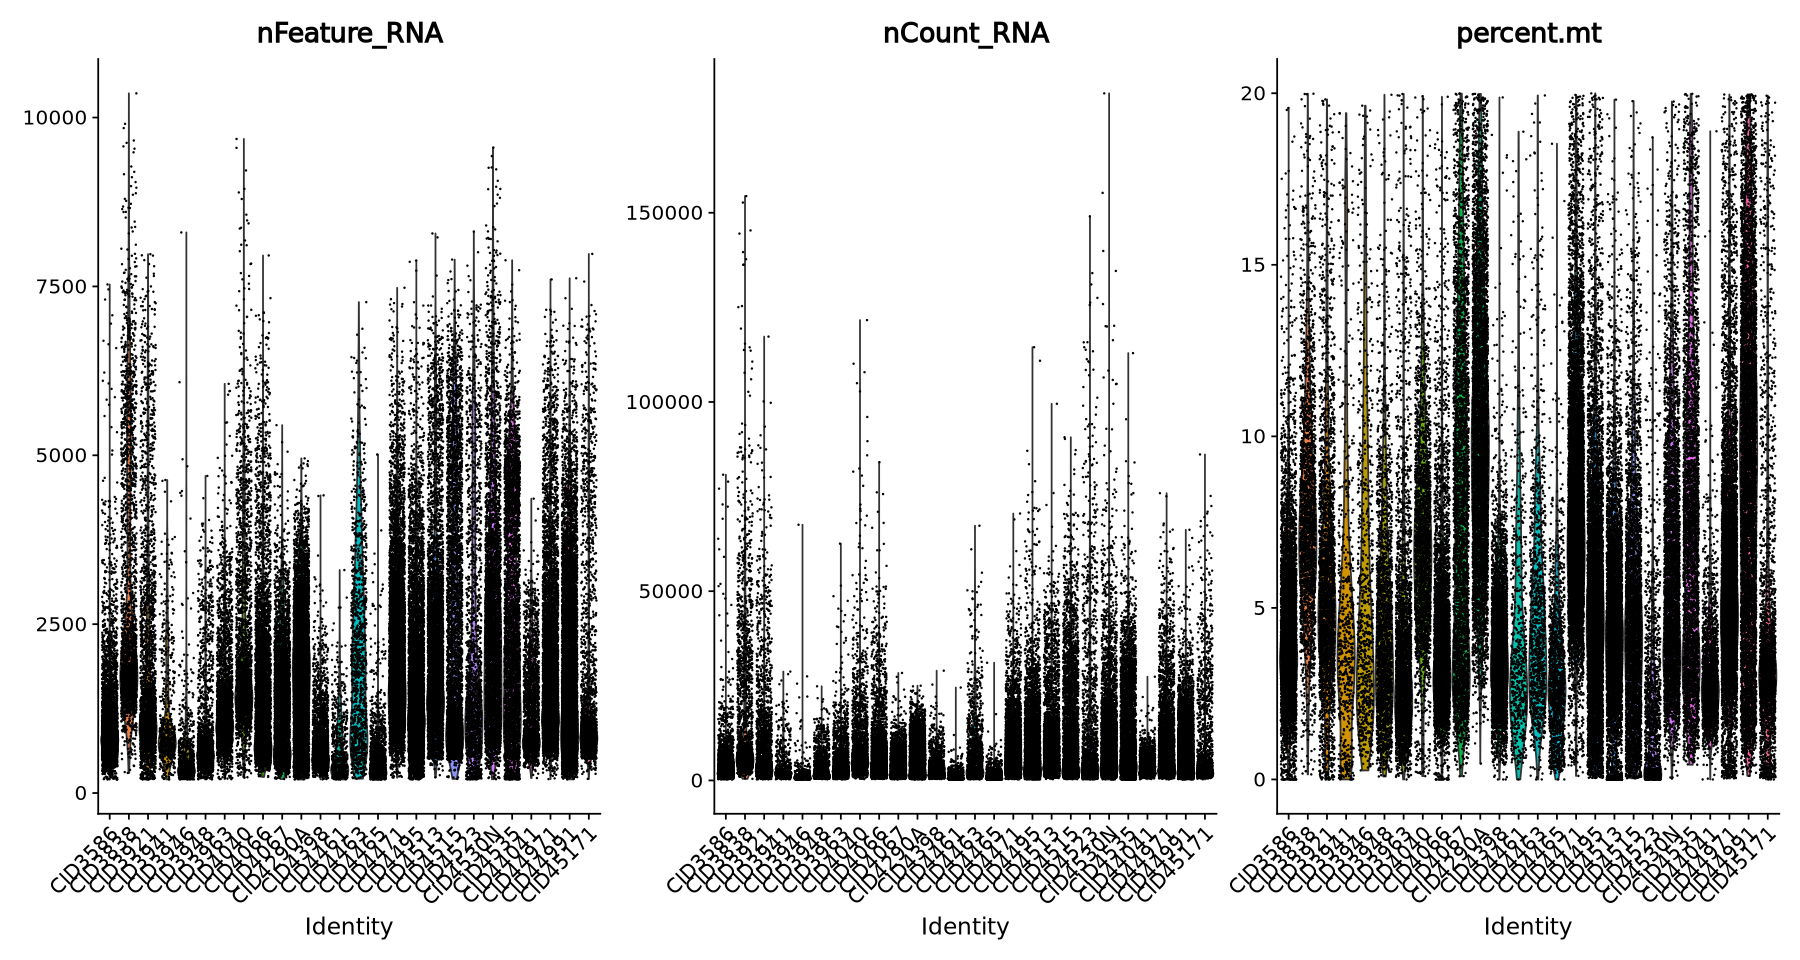

In [38]:
#QC Steps 
BC[["percent.mt"]] <- PercentageFeatureSet(BC, pattern = "^MT-")
#Visualise QC metrics
options(repr.plot.height=8, repr.plot.width=15)
VlnPlot(BC, features = c("nFeature_RNA", "nCount_RNA", "percent.mt"), ncol = 3)

In [39]:
#Normalise the data
BC <- NormalizeData(BC)

Normalizing layer: counts.1

Normalizing layer: counts.2

Normalizing layer: counts.3

Normalizing layer: counts.4

Normalizing layer: counts.5

Normalizing layer: counts.6

Normalizing layer: counts.7

Normalizing layer: counts.8

Normalizing layer: counts.9

Normalizing layer: counts.10

Normalizing layer: counts.11

Normalizing layer: counts.12

Normalizing layer: counts.13

Normalizing layer: counts.14

Normalizing layer: counts.15

Normalizing layer: counts.16

Normalizing layer: counts.17

Normalizing layer: counts.18

Normalizing layer: counts.19

Normalizing layer: counts.20

Normalizing layer: counts.21

Normalizing layer: counts.22

Normalizing layer: counts.23

Normalizing layer: counts.24

Normalizing layer: counts.25

Normalizing layer: counts.26



In [40]:
#Find variable features
BC <- FindVariableFeatures(BC, selection.method = "vst", nfeatures = 2000)

Finding variable features for layer counts.1

Finding variable features for layer counts.2

Finding variable features for layer counts.3

Finding variable features for layer counts.4

Finding variable features for layer counts.5

Finding variable features for layer counts.6

Finding variable features for layer counts.7

Finding variable features for layer counts.8

Finding variable features for layer counts.9

Finding variable features for layer counts.10

Finding variable features for layer counts.11

Finding variable features for layer counts.12

Finding variable features for layer counts.13

Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“pseudoinverse used at -2.499”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“neighborhood radius 0.30103”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“reciprocal condition number  4.7083e-16”
Finding variable features

In [41]:
#Scale the data
BC <- ScaleData(BC, vars.to.regress = c("percent.mt", "nCount_RNA"))

Regressing out percent.mt, nCount_RNA

Centering and scaling data matrix



In [42]:
#Run PCA
BC <- RunPCA(BC, features = VariableFeatures(object = BC))

PC_ 1 
Positive:  SPARC, IGFBP7, SPARCL1, CALD1, IGFBP4, PTRF, SERPING1, GSN, BGN, COL6A2 
	   NNMT, COL1A2, MYL9, IFITM3, TIMP3, COL1A1, COL3A1, COL6A1, FSTL1, LHFP 
	   CTGF, CAV1, PCOLCE, TCF4, PRKCDBP, C1S, DCN, TAGLN, AEBP1, THY1 
Negative:  PTPRC, CD52, CXCR4, CORO1A, CD3E, SRGN, LAPTM5, CD69, RGS1, CD3D 
	   HCST, DUSP2, CD2, FYB, TNFAIP3, CCL5, CD7, IL7R, LCP1, TRBC2 
	   ALOX5AP, SAMSN1, DUSP4, LTB, CST7, ITGB2, SLC9A3R1, TAGAP, NKG7, TRAC 
PC_ 2 
Positive:  KRT18, KRT19, KRT8, CLDN4, AZGP1, PERP, ELF3, FXYD3, KRT7, MGST1 
	   TACSTD2, CLDN3, RAB25, CLDN7, CD24, EPCAM, SMIM22, SPDEF, DSP, DSTN 
	   S100A14, EFHD1, CRABP2, PLPP2, ZG16B, AGR2, MAL2, TSPAN13, SPINT2, SERINC2 
Negative:  C1QA, AIF1, C1QB, TYROBP, C1QC, CD68, MS4A6A, FCER1G, CYBB, SPI1 
	   FCGR3A, FCGR2A, LYZ, CSF1R, HLA-DPA1, CD14, HLA-DRA, HLA-DPB1, LILRB4, IGSF6 
	   C5AR1, HLA-DRB1, CD163, LST1, FCGR1A, CD74, MS4A4A, MSR1, APOC1, HLA-DQB1 
PC_ 3 
Positive:  COL1A2, LUM, CTSK, COL1A1, COL3A1, DCN, COL6A3, SFRP2

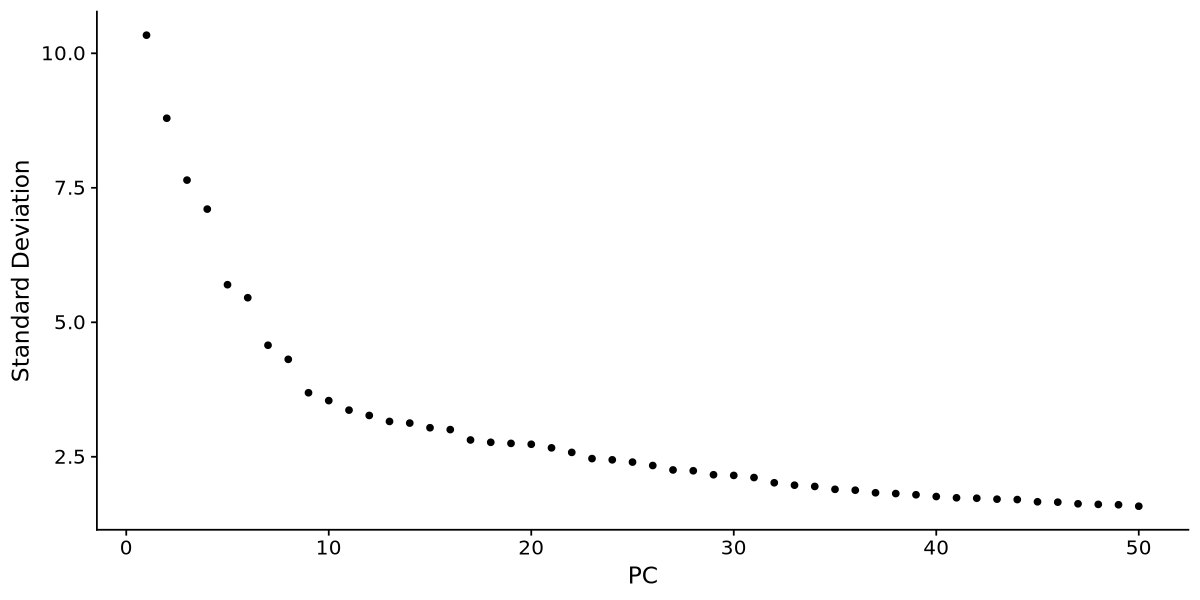

In [43]:
#make elbow plot
options(repr.plot.height=5, repr.plot.width=10)
ElbowPlot(BC, ndims=50)
#in GSE213243 decided to use 40 PC, staying consistent across datasets

In [44]:
#Find neighbours (make sure number matches no. features chosen above)
BC <- FindNeighbors(BC, dims = 1:40)

Computing nearest neighbor graph



Computing SNN



In [45]:
#Run UMAP
BC <- RunUMAP(BC, dims = 1:40)

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
09:02:27 UMAP embedding parameters a = 0.9922 b = 1.112

09:02:27 Read 100064 rows and found 40 numeric columns

09:02:27 Using Annoy for neighbor search, n_neighbors = 30

09:02:27 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

09:02:34 Writing NN index file to temp file /scratch/temp/9626501/RtmpJtWmgL/file27c4072401f4fd

09:02:34 Searching Annoy index using 1 thread, search_k = 3000

09:03:02 Annoy recall = 100%

09:03:03 Commencing smooth kNN distance calibration using 1 thread
 with

In [46]:
#Cluster, resolution here set to 0.2
BC <- FindClusters(BC, resolution = 0.2)

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 100064
Number of edges: 3654155

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9767
Number of communities: 26
Elapsed time: 26 seconds


Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



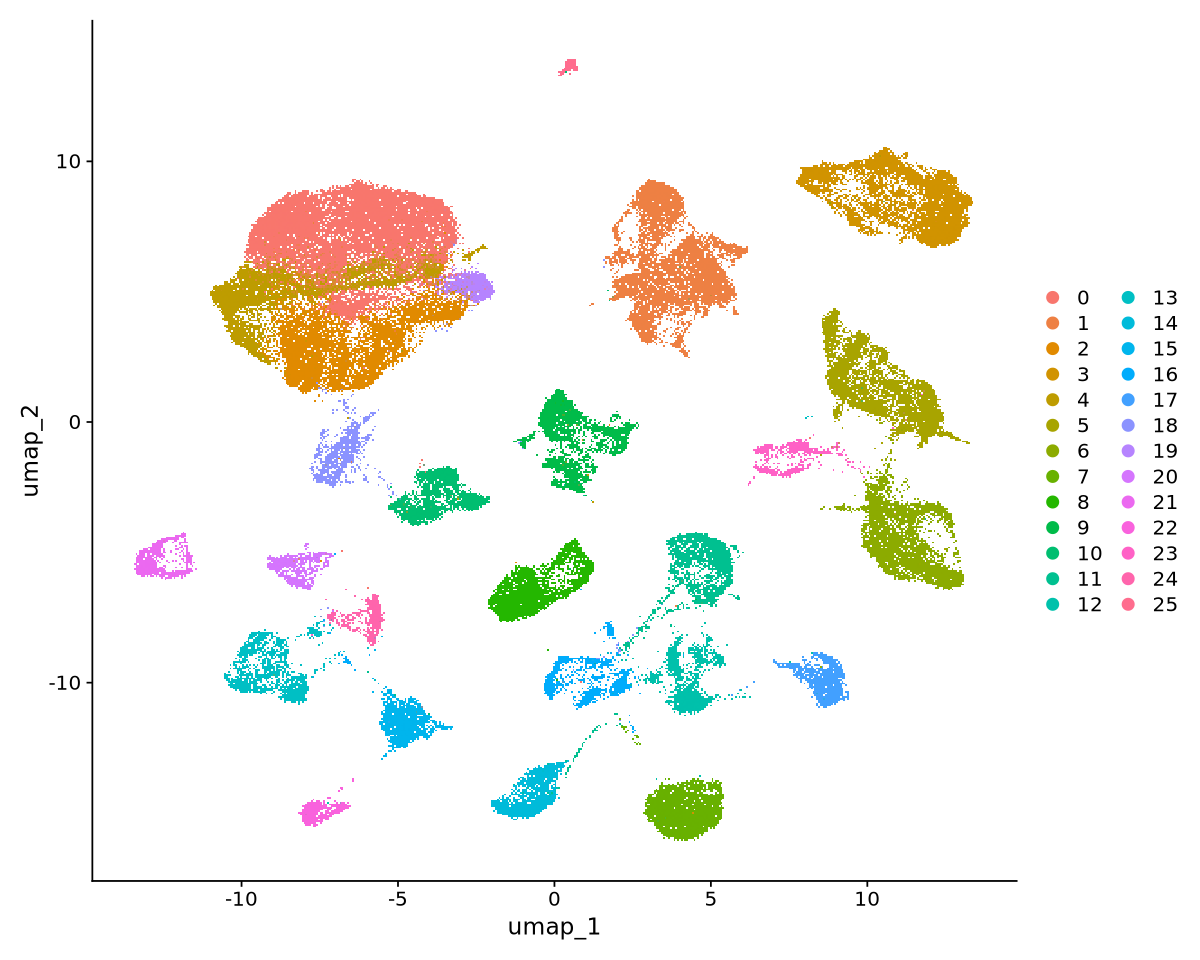

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



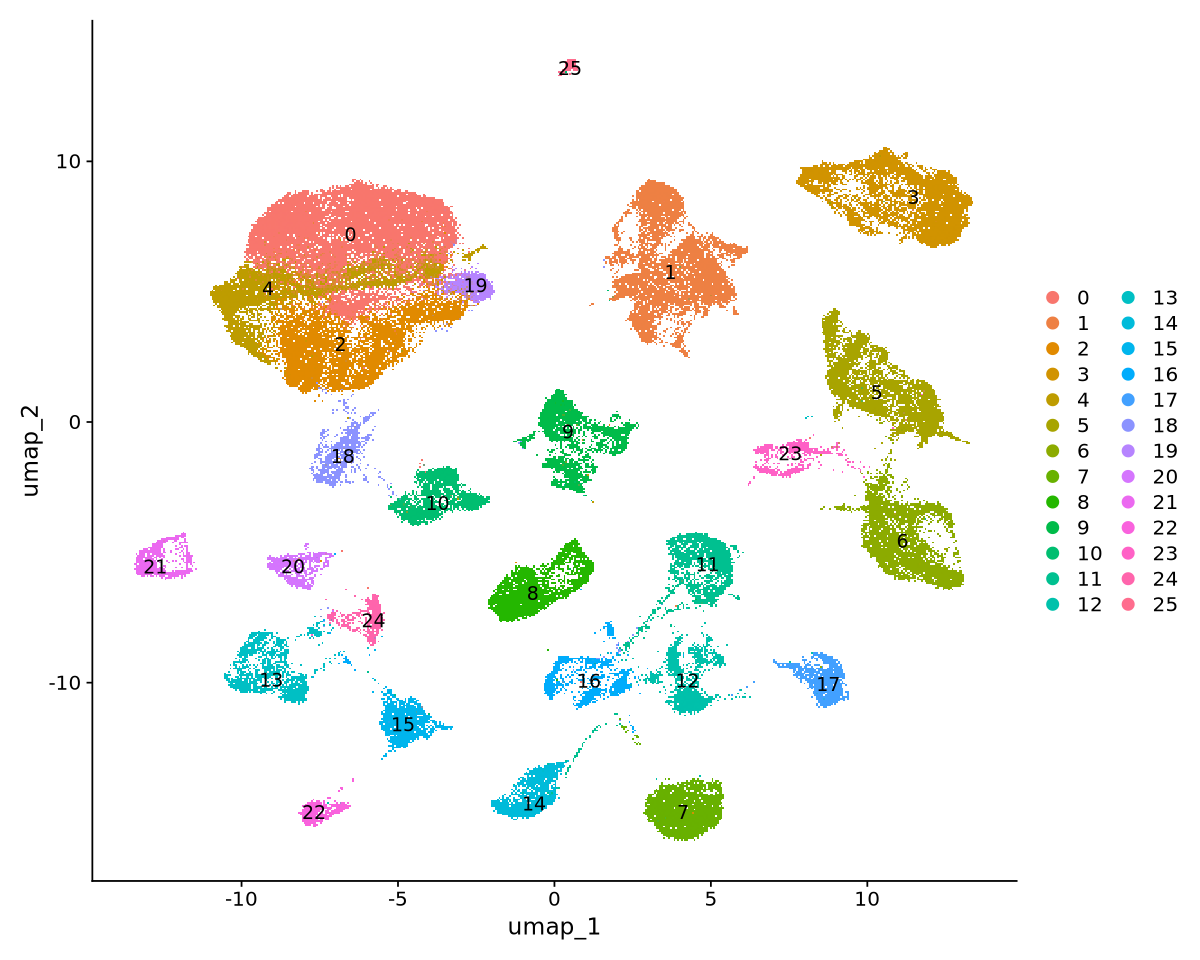

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



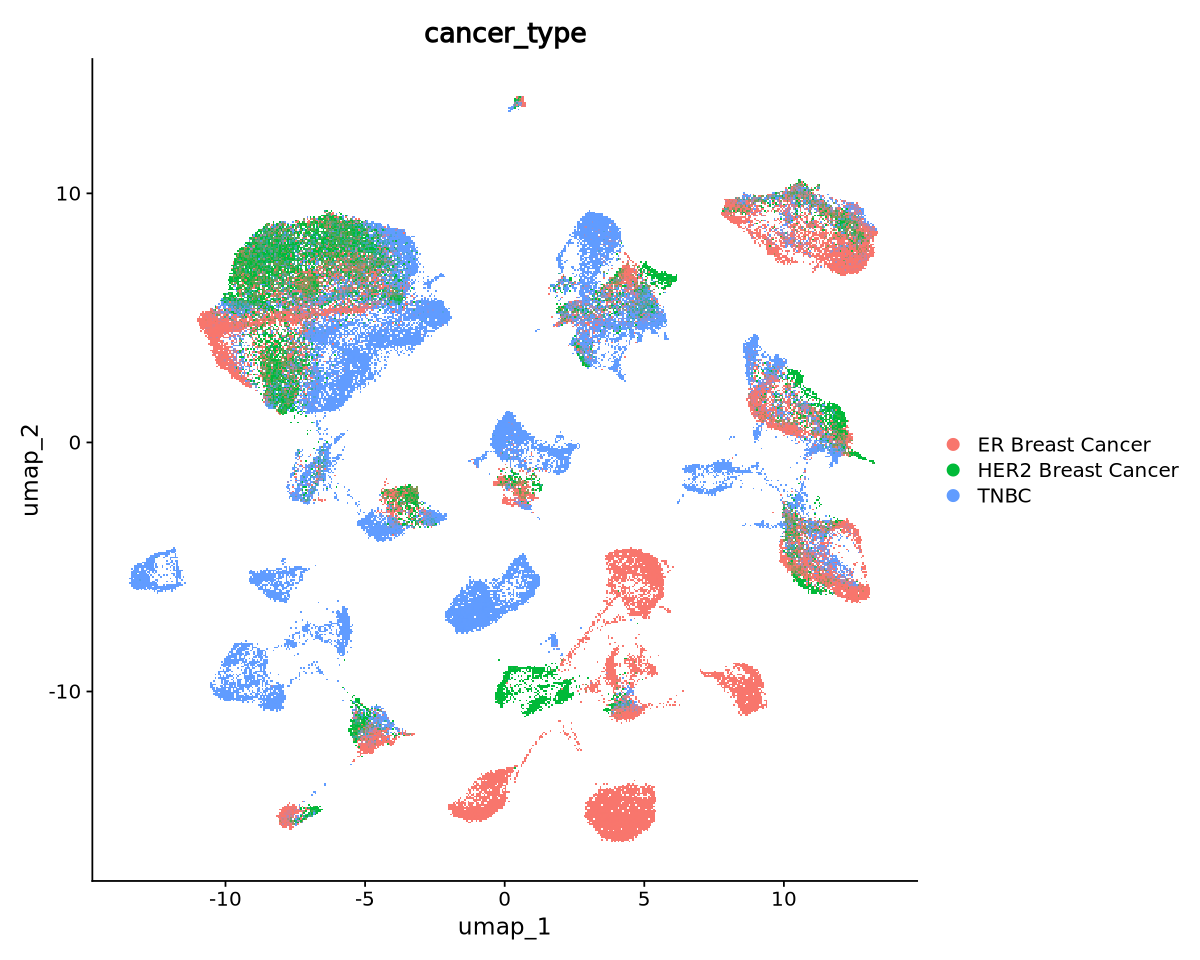

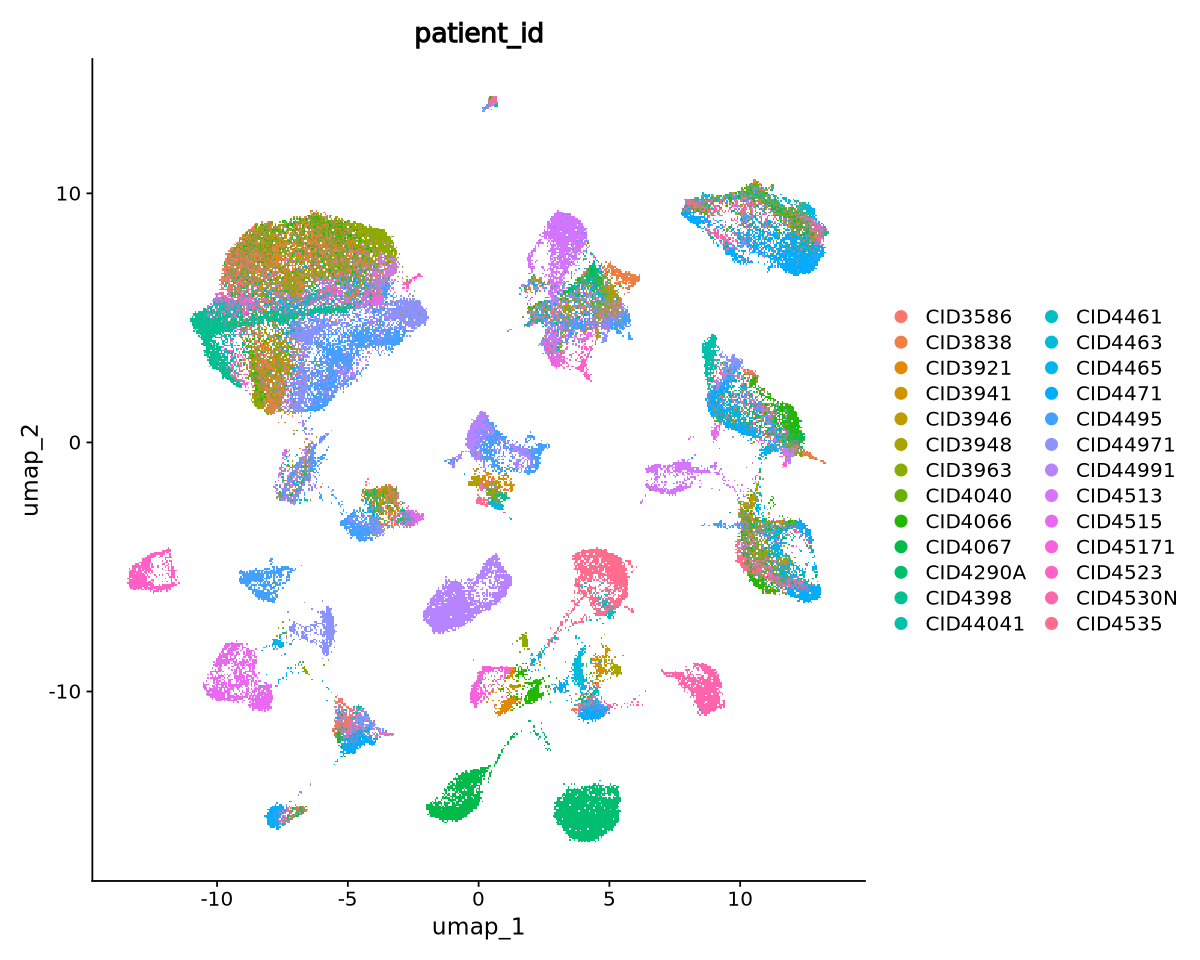

In [47]:
#Plot UMAP
options(repr.plot.height=8, repr.plot.width=10)
DimPlot(BC, reduction = "umap")
DimPlot(BC, reduction = "umap", label=TRUE)
DimPlot(BC, reduction = "umap", group = "cancer_type")
DimPlot(BC, reduction = "umap", group = "patient_id")

In [48]:
#Save the object at this point so it can be loaded in without running steps above
saveRDS(BC, file = "/scratch/user/s4436039/scdata/GSE176078/GSE176078.RDS")

#### Next part of code is about determining which cluster is the myeloid cells

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To di

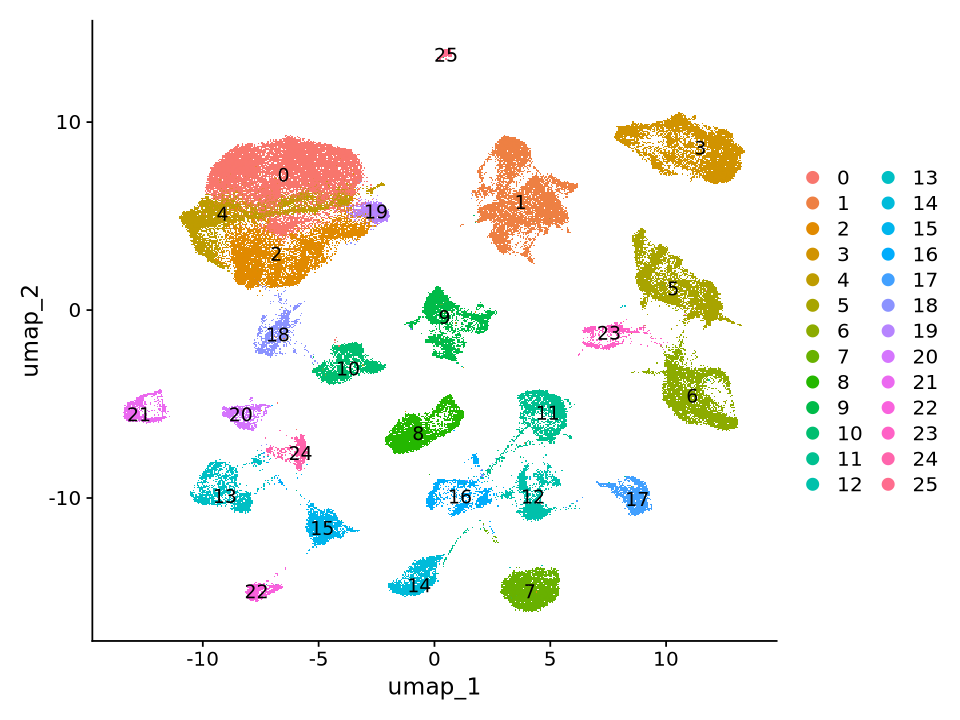

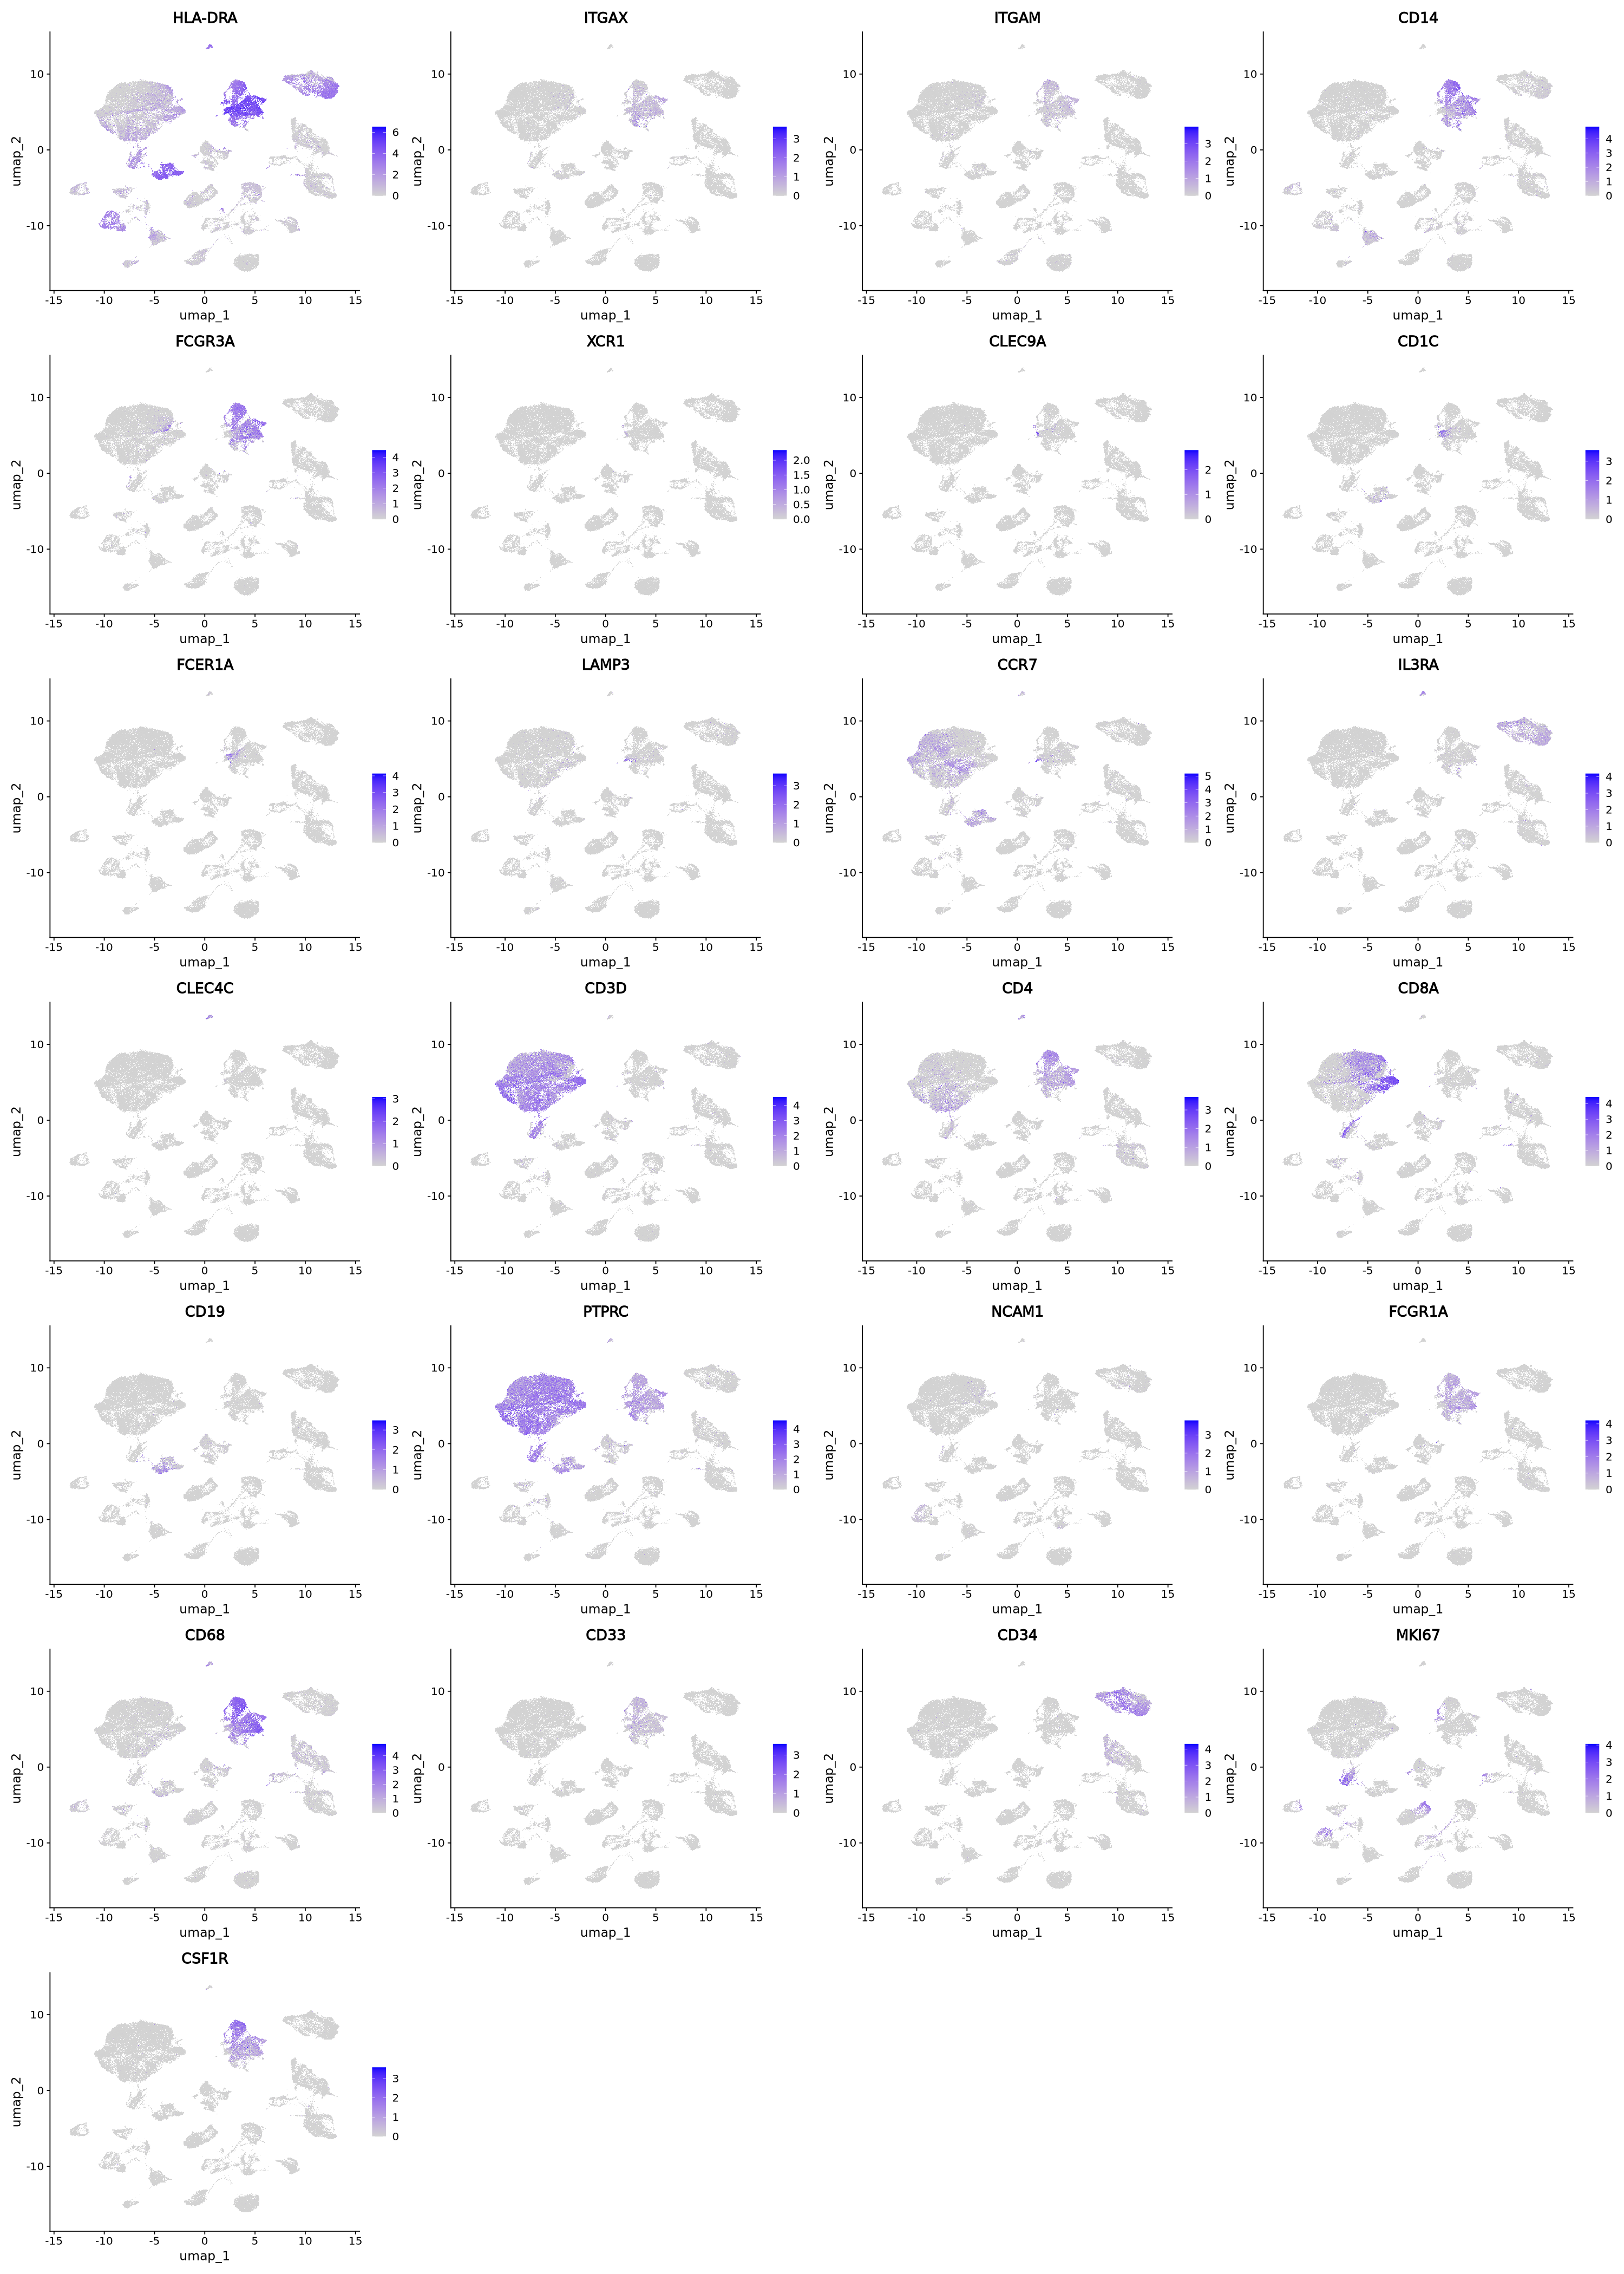

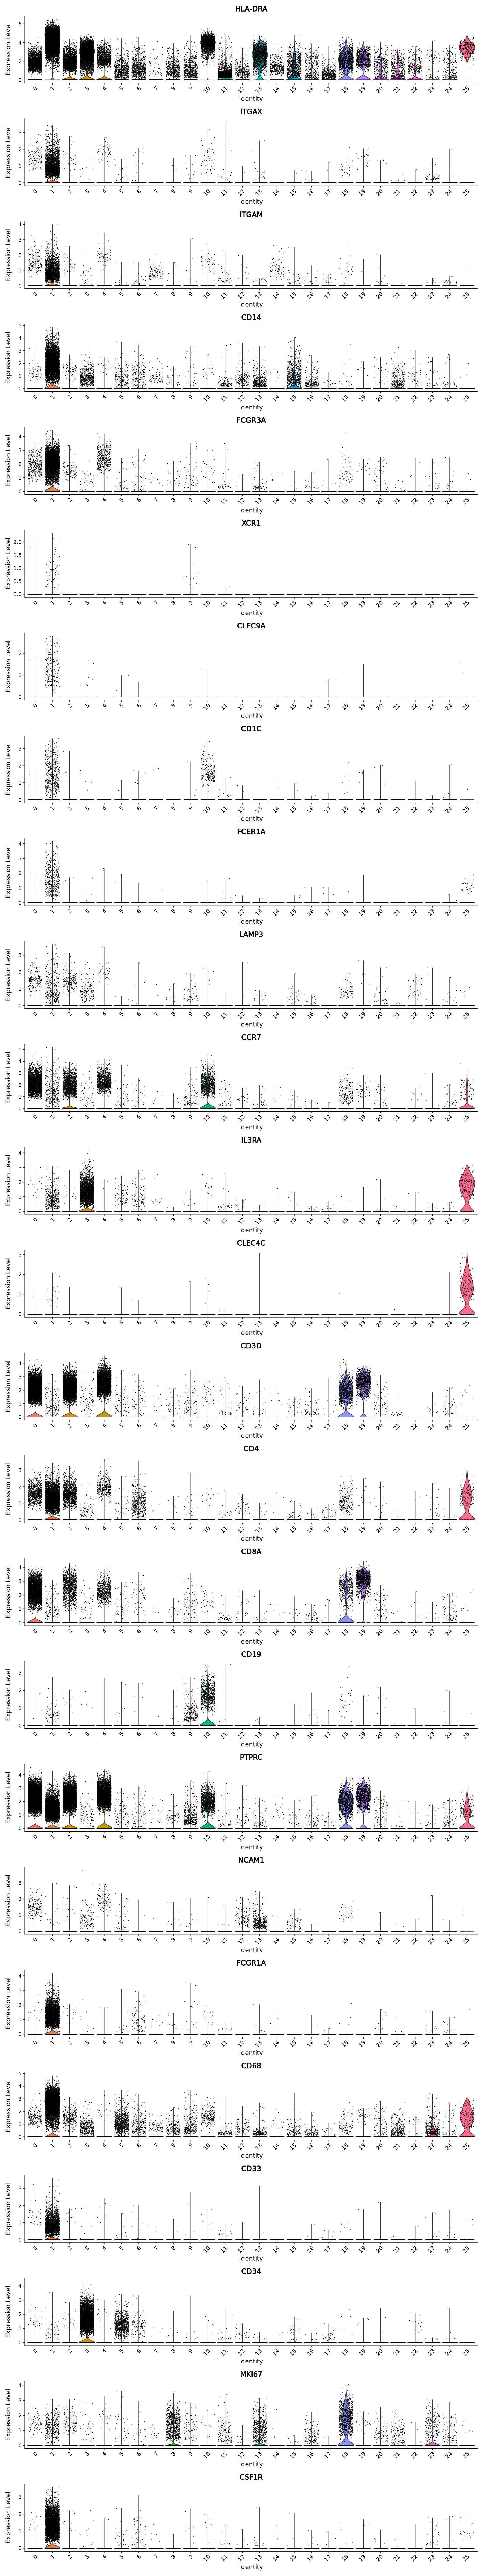

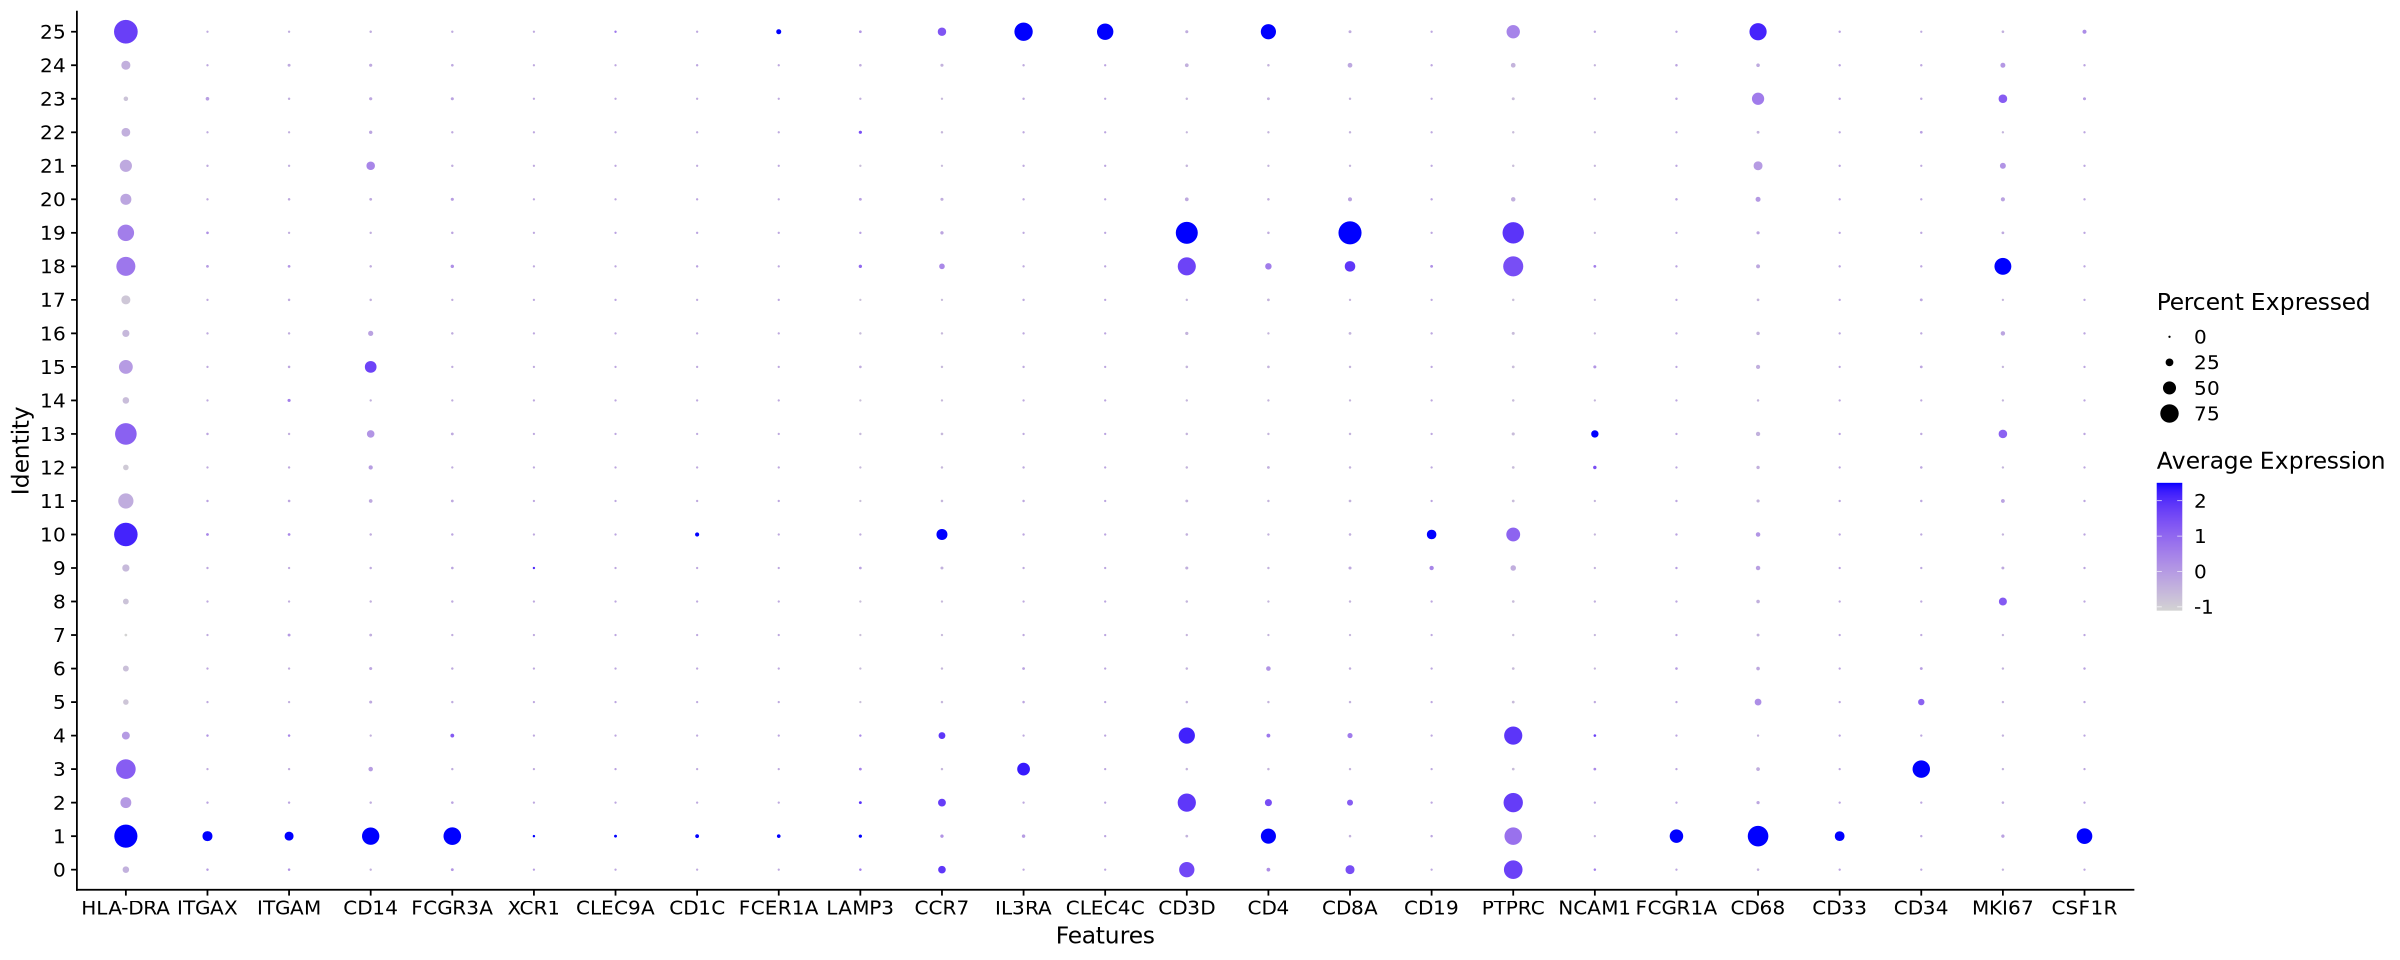

In [51]:
#Same genes over UMAP
options(repr.plot.height=6, repr.plot.width=8)
DimPlot(BC, reduction = "umap", label=TRUE)

options(repr.plot.height=35, repr.plot.width=25)
FeaturePlot(BC, features = c("HLA-DRA", "ITGAX", "ITGAM", "CD14", "FCGR3A", "XCR1", "CLEC9A", "CD1C", "FCER1A", "LAMP3", "CCR7", "IL3RA", "CLEC4C", "CD3D", "CD4", "CD8A", "CD19", "PTPRC", "NCAM1", "FCGR1A", "CD68", "CD33", "CD34", "MKI67", "CSF1R"), order = TRUE)

#Violin plots of classic markers
options(repr.plot.height=80, repr.plot.width=15)
VlnPlot(BC, features = c("HLA-DRA", "ITGAX", "ITGAM", "CD14", "FCGR3A", "XCR1", "CLEC9A", "CD1C", "FCER1A", "LAMP3", "CCR7", "IL3RA", "CLEC4C", "CD3D", "CD4", "CD8A", "CD19", "PTPRC", "NCAM1", "FCGR1A", "CD68", "CD33", "CD34", "MKI67", "CSF1R"), ncol=1)

#Same as above but dot plot
options(repr.plot.height=8, repr.plot.width=20)
DotPlot(BC, features = c("HLA-DRA", "ITGAX", "ITGAM", "CD14", "FCGR3A", "XCR1", "CLEC9A", "CD1C", "FCER1A", "LAMP3", "CCR7", "IL3RA", "CLEC4C", "CD3D", "CD4", "CD8A", "CD19", "PTPRC", "NCAM1", "FCGR1A", "CD68", "CD33", "CD34", "MKI67", "CSF1R"))

#### From above it looks like cluster 1 is the myeloid cells, now subsetting out this clusters

In [52]:
head(BC@meta.data)

orig.ident nCount_RNA nFeature_RNA
GSE176078_HER2_CID3586_AAGACCTCAGCATGAG CID3586    4581       1689        
GSE176078_HER2_CID3586_AAGGTTCGTAGTACCT CID3586    1726        779        
GSE176078_HER2_CID3586_ACCAGTAGTTGTGGCC CID3586    1229        514        
GSE176078_HER2_CID3586_ACCCACTAGATGTCGG CID3586    1352        609        
GSE176078_HER2_CID3586_ACTGATGGTCAACTGT CID3586    1711        807        
GSE176078_HER2_CID3586_ACTTGTTAGGGAAACA CID3586    1468        764        
                                        X                        percent.mito
GSE176078_HER2_CID3586_AAGACCTCAGCATGAG CID3586_AAGACCTCAGCATGAG  1.506221   
GSE176078_HER2_CID3586_AAGGTTCGTAGTACCT CID3586_AAGGTTCGTAGTACCT  5.793743   
GSE176078_HER2_CID3586_ACCAGTAGTTGTGGCC CID3586_ACCAGTAGTTGTGGCC  1.383238   
GSE176078_HER2_CID3586_ACCCACTAGATGTCGG CID3586_ACCCACTAGATGTCGG  1.923077   
GSE176078_HER2_CID3586_ACTGATGGTCAACTGT CID3586_ACTGATGGTCAACTGT 13.325541   
GSE176078_HER2_CID3586_ACTTGTTAGGGAAACA CID3586_ACTTGTTAGGGAAACA  3.610354   
                                        subtype celltype_subset  
GSE176078_HER2_CID3586_AAGACCTCAGCATGAG HER2+   Endothelial ACKR1
GSE176078_HER2_CID3586_AAGGTTCGTAGTACCT HER2+   Endothelial ACKR1
GSE176078_HER2_CID3586_ACCAGTAGTTGTGGCC HER2+   Endothelial ACKR1
GSE176078_HER2_CID3586_ACCCACTAGATGTCGG HER2+   Endothelial ACKR1
GSE176078_HER2_CID3586_ACTGATGGTCAACTGT HER2+   Endothelial ACKR1
GSE176078_HER2_CID3586_ACTTGTTAGGGAAACA HER2+   Endothelial ACKR1
                                        celltype_minor    celltype_major
GSE176078_HER2_CID3586_AAGACCTCAGCATGAG Endothelial ACKR1 Endothelial   
GSE176078_HER2_CID3586_AAGGTTCGTAGTACCT Endothelial ACKR1 Endothelial   
GSE176078_HER2_CID3586_ACCAGTAGTTGTGGCC Endothelial ACKR1 Endothelial   
GSE176078_HER2_CID3586_ACCCACTAGATGTCGG Endothelial ACKR1 Endothelial   
GSE176078_HER2_CID3586_ACTGATGGTCAACTGT Endothelial ACKR1 Endothelial   
GSE176078_HER2_CID3586_ACTTGTTAGGGAAACA Endothelial ACKR1 Endothelial   
                                        sample_type cancer_type       
GSE176078_HER2_CID3586_AAGACCTCAGCATGAG tumour      HER2 Breast Cancer
GSE176078_HER2_CID3586_AAGGTTCGTAGTACCT tumour      HER2 Breast Cancer
GSE176078_HER2_CID3586_ACCAGTAGTTGTGGCC tumour      HER2 Breast Cancer
GSE176078_HER2_CID3586_ACCCACTAGATGTCGG tumour      HER2 Breast Cancer
GSE176078_HER2_CID3586_ACTGATGGTCAACTGT tumour      HER2 Breast Cancer
GSE176078_HER2_CID3586_ACTTGTTAGGGAAACA tumour      HER2 Breast Cancer
                                        patient_id
GSE176078_HER2_CID3586_AAGACCTCAGCATGAG CID3586   
GSE176078_HER2_CID3586_AAGGTTCGTAGTACCT CID3586   
GSE176078_HER2_CID3586_ACCAGTAGTTGTGGCC CID3586   
GSE176078_HER2_CID3586_ACCCACTAGATGTCGG CID3586   
GSE176078_HER2_CID3586_ACTGATGGTCAACTGT CID3586   
GSE176078_HER2_CID3586_ACTTGTTAGGGAAACA CID3586   
                                        sample_id                    
GSE176078_HER2_CID3586_AAGACCTCAGCATGAG GSE176078_HER2_breast_CID3586
GSE176078_HER2_CID3586_AAGGTTCGTAGTACCT GSE176078_HER2_breast_CID3586
GSE176078_HER2_CID3586_ACCAGTAGTTGTGGCC GSE176078_HER2_breast_CID3586
GSE176078_HER2_CID3586_ACCCACTAGATGTCGG GSE176078_HER2_breast_CID3586
GSE176078_HER2_CID3586_ACTGATGGTCAACTGT GSE176078_HER2_breast_CID3586
GSE176078_HER2_CID3586_ACTTGTTAGGGAAACA GSE176078_HER2_breast_CID3586
                                        percent.mt RNA_snn_res.0.2
GSE176078_HER2_CID3586_AAGACCTCAGCATGAG  1.506221  3              
GSE176078_HER2_CID3586_AAGGTTCGTAGTACCT  5.793743  3              
GSE176078_HER2_CID3586_ACCAGTAGTTGTGGCC  1.383238  3              
GSE176078_HER2_CID3586_ACCCACTAGATGTCGG  1.923077  3              
GSE176078_HER2_CID3586_ACTGATGGTCAACTGT 13.325541  3              
GSE176078_HER2_CID3586_ACTTGTTAGGGAAACA  3.610354  3              
                                        seurat_clusters
GSE176078_HER2_CID3586_AAGACCTCAGCATGAG 3              
GSE176078_HER2_CID3586_AAGGTTCGTAGTACCT 3              
GSE176078_HER2_

In [53]:
myeloid_BC <- subset(BC, subset = RNA_snn_res.0.2 %in% c("1"))

In [54]:
BC
myeloid_BC

An object of class Seurat 
29733 features across 100064 samples within 1 assay 
Active assay: RNA (29733 features, 2000 variable features)
 53 layers present: counts.1, counts.2, counts.3, counts.4, counts.5, counts.6, counts.7, counts.8, counts.9, counts.10, counts.11, counts.12, counts.13, counts.14, counts.15, counts.16, counts.17, counts.18, counts.19, counts.20, counts.21, counts.22, counts.23, counts.24, counts.25, counts.26, data.1, data.2, data.3, data.4, data.5, data.6, data.7, data.8, data.9, data.10, data.11, data.12, data.13, data.14, data.15, data.16, data.17, data.18, data.19, data.20, data.21, data.22, data.23, data.24, data.25, data.26, scale.data
 2 dimensional reductions calculated: pca, umap

An object of class Seurat 
29733 features across 9374 samples within 1 assay 
Active assay: RNA (29733 features, 2000 variable features)
 53 layers present: counts.1, counts.2, counts.3, counts.4, counts.5, counts.6, counts.7, counts.8, counts.9, counts.10, counts.11, counts.12, counts.13, counts.14, counts.15, counts.16, counts.17, counts.18, counts.19, counts.20, counts.21, counts.22, counts.23, counts.24, counts.25, counts.26, data.1, data.2, data.3, data.4, data.5, data.6, data.7, data.8, data.9, data.10, data.11, data.12, data.13, data.14, data.15, data.16, data.17, data.18, data.19, data.20, data.21, data.22, data.23, data.24, data.25, data.26, scale.data
 2 dimensional reductions calculated: pca, umap

In [55]:
saveRDS(myeloid_BC, "/scratch/user/s4436039/scdata/GSE176078/GSE176078_myeloid.RDS")

#### Following the above then need to move entire GSE176078 folder from scratch to rdm
``` bash
rsync -azvhp /scratch/user/s4436039/scdata/GSE176078/ /QRISdata/Q5935/nikita/scdata/GSE176078
```